# Análisis de datos - Trabajo final integrador

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQATNC-EBwF-LIbDVv_L0gkP2V6oKQzah5GRg&usqp=CAU"/>

Se propone realizar el ciclo completo del desarrollo de un modelo de aprendizaje automático supervisado.

Trabajaremos con un [dataset de Kaggle con datos de por distintas estaciones metereológicas de Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv).

El objetivo es predecir si lloverá o no al día siguiente (variable *RainTomorrow*), en función datos metereológicos del día actual.


## Enunciado

- Descargar el [dataset de kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv)

### 1. Análisis exploratorio inicial

- Visualizar las primeras filas.
- Realizar un resumen de 5 números.
- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
- Identificar las variables de entrada y de salida del problema.
- Variables de entrada:
  - Realizar los siguientes análisis por tipo de variable.
    - Numéricas: 
      - Obtener conclusiones acerca de la distribución de los datos.
    - Categóricas
        - Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
    - Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
- Variables de salida:
  - ¿Están balanceadas las clases?
  - ¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

### 2. Esquema de validación de resultados

- Los pasos siguientes comprenden las etapas de preparación de datos y evaluación de resultados. 
- Para ello, se debe particionar el dataset en entrenamiento y validación.

### 3. Limpieza y preparación de datos / ingeniería de features

- Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.
- ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría?. Ensayar distintas técnicas y analizar los resultados. 
- En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo númerico/categórico.
- ¿Qué puede decir acerca de las relaciones entre las variables de entrada?

- Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor importancia?. Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.

### 4. Entrenamiento de modelos

- Recurriendo a los modelos que conozca, defina una lista de modelos candidatos a entrenar (puede ser el mismo tipo de clasificador con distintos hiperparámetros). Nota: no se contemplará el desempeño del modelo elegido, sino las conclusiones que puedan establecerse a partir de la preparación previa de los datos.

- Ensaye distintas cadenas de procesamiento con las técnicas consideradas en la sección 3 (por ejemplo, distintas técnicas de imputación, selección de variables de entrada, codificación de variables categóricas, transformación, etc.).

### 5. Evaluación de resultados y conclusiones

- ¿Qué puede concluir acerca de los modelos y preparaciones de datos ensayadas? Tener en cuenta como cada preparación afecta a los distintos modelos.

### 6. Presentación de resultados

- Elabore un informe de dos o tres páginas describiendo el procedimiento realizado y las conclusiones importantes indicando la ruta del código fuente en git.


-------------------------------------------------------------------------------------------------------
# 1- Análisis exploratorio inicial

In [500]:
# Importamos librerias
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns; sns.set()
import statistics as stat
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (20, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 20
pd.set_option('display.max_columns', None)

In [265]:
# Cargamos el dataset
df_weather = pd.read_csv("./weatherAUS.csv")

In [266]:
# Visualizamos primeras filas
df_weather.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [267]:
# Hacemos un resumen del dataset
df_weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [268]:
df_weather.shape

(145460, 23)

In [269]:
df_weather.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Comenazamos analizando las variables de entrada y salida. 

Variables de entrada: Todas las columnas excepto por la última "RainTomorrow".

Variables de salida: "RainTomorrow". Como el objetivo es predecir si mañana llueve o no, es un problema de clasifcación binaria.


Nota: Algunas de las variables de entrada, se refieren a distintas horas del día. Entonces, tendría que tener en cuenta en que momento del día se ejecutaría el modelo de predicción para considerar si esas variables van a estar disponibles o no. En principio supondremos que todas las variables están disponibles al momento de la predicción.

## Analisis de columnas

##### Columna Date

In [270]:
df_weather['Date'].describe()

count         145460
unique          3436
top       2015-08-06
freq              49
Name: Date, dtype: object

La columna Date es una variable del tipo Fecha. Notamos que existen 3436 valores únicos en los 145460 registros. Por lo que o existen valores faltantes, o existen fechas repetidas.

In [271]:
# Cantidad de null en fecha
print(df_weather['Date'].isnull().sum())
print(df_weather.groupby(['Date']).count().shape)
print(df_weather.groupby(['Date','Location']).count().shape)

0
(3436, 22)
(145460, 21)


Observamos que las fechas estan repetidas para diferentes ciudades. Por lo que ambas columnas deberan ser incluidas para poder tener registros únicos.

En el caso de la fecha, se cree que tiene importancia ya que hay meses donde la lluvia es mas abundante que en otros meses. Sin embargo, no se cree relevante toda la fecha en sí, sino que se cree sería conveniente convertir la fecha únicamente al mes. Corroboramos realizando el ploteo de la salida (Rain Tomorrow) en fución de la fecha en diferentes granularidades para una sola localidad.

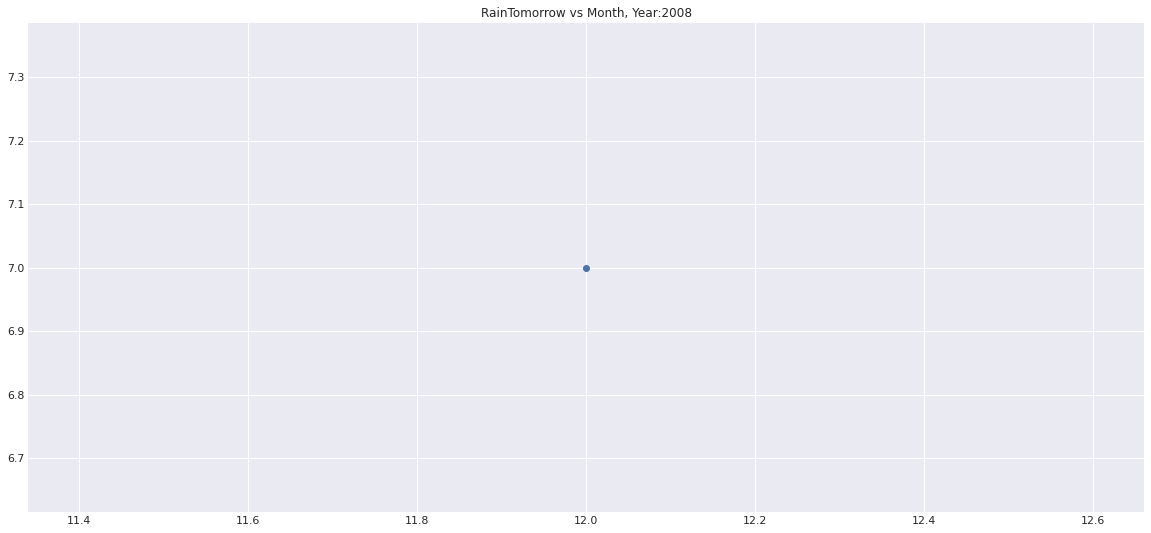

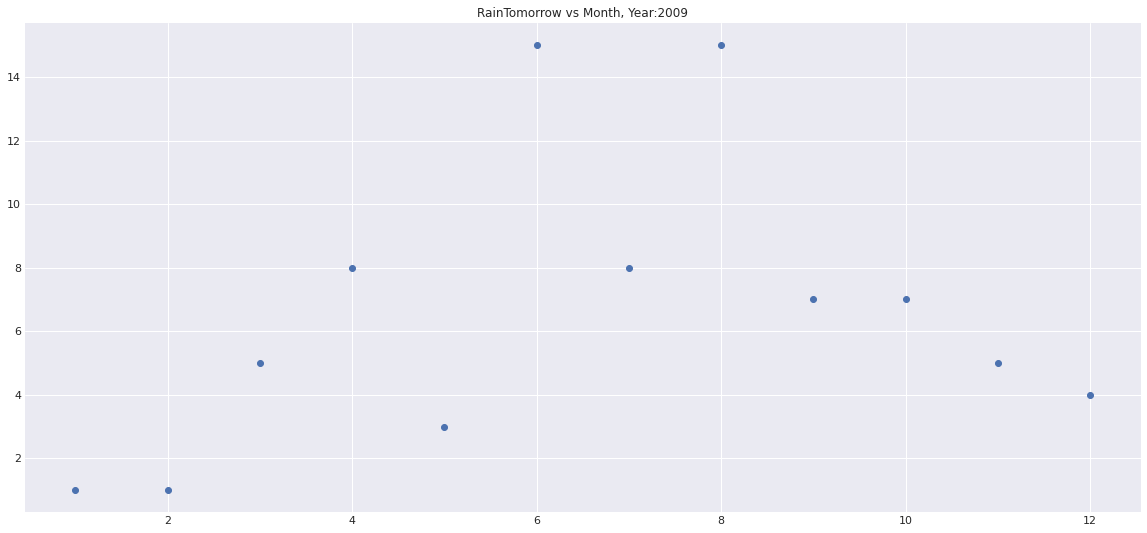

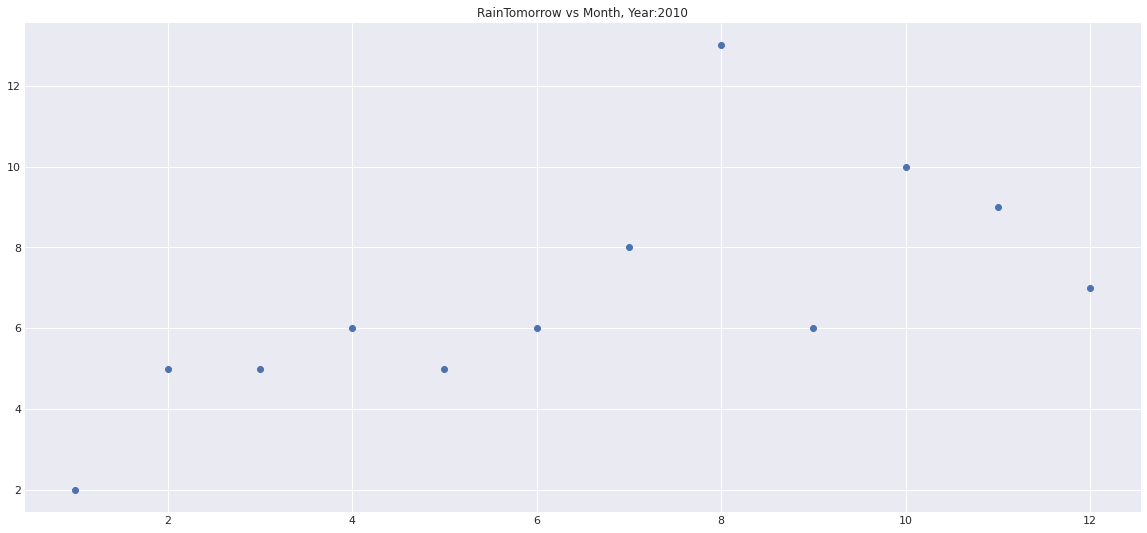

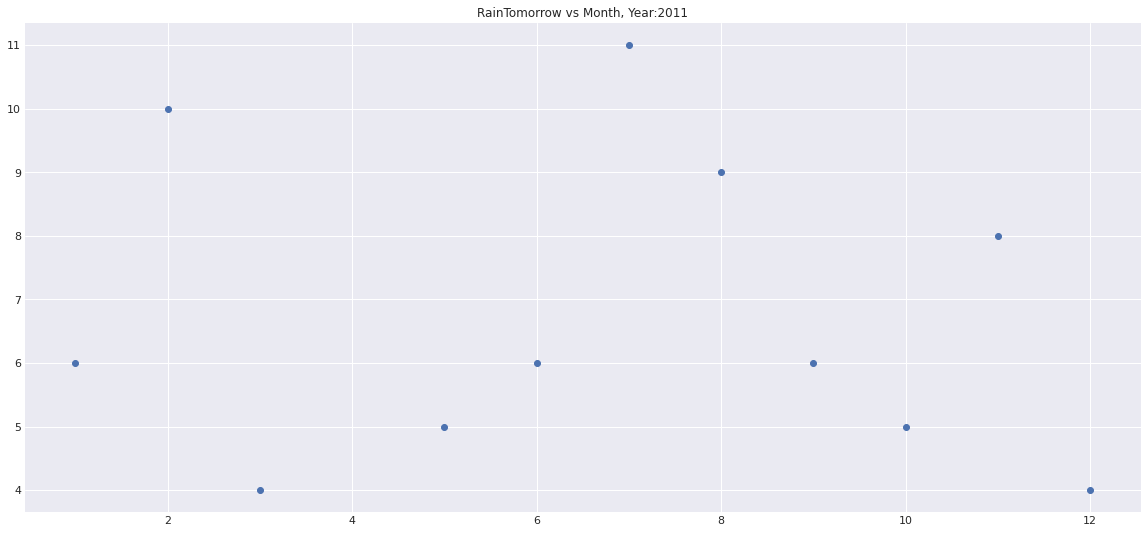

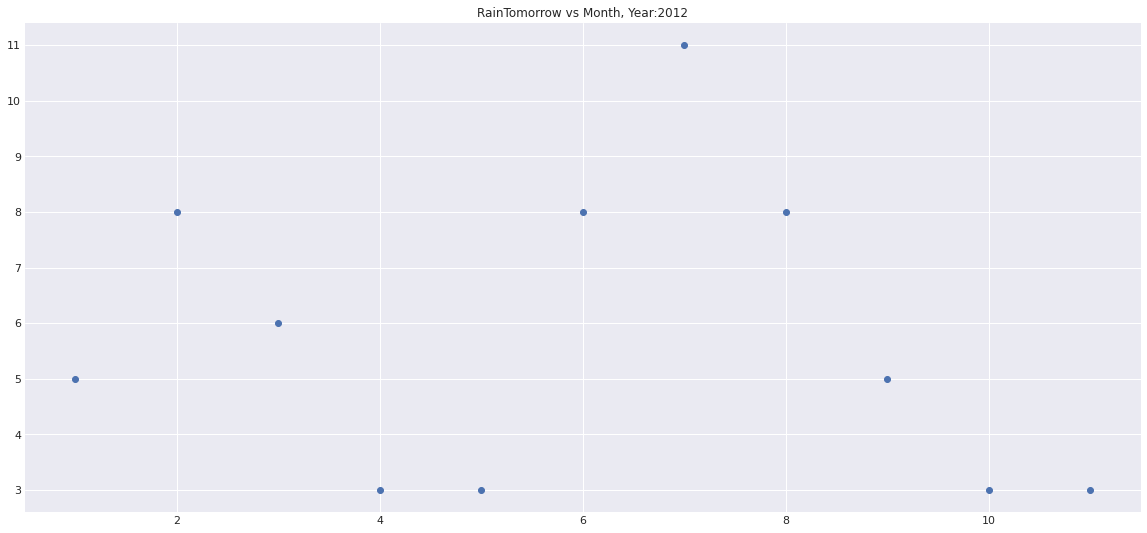

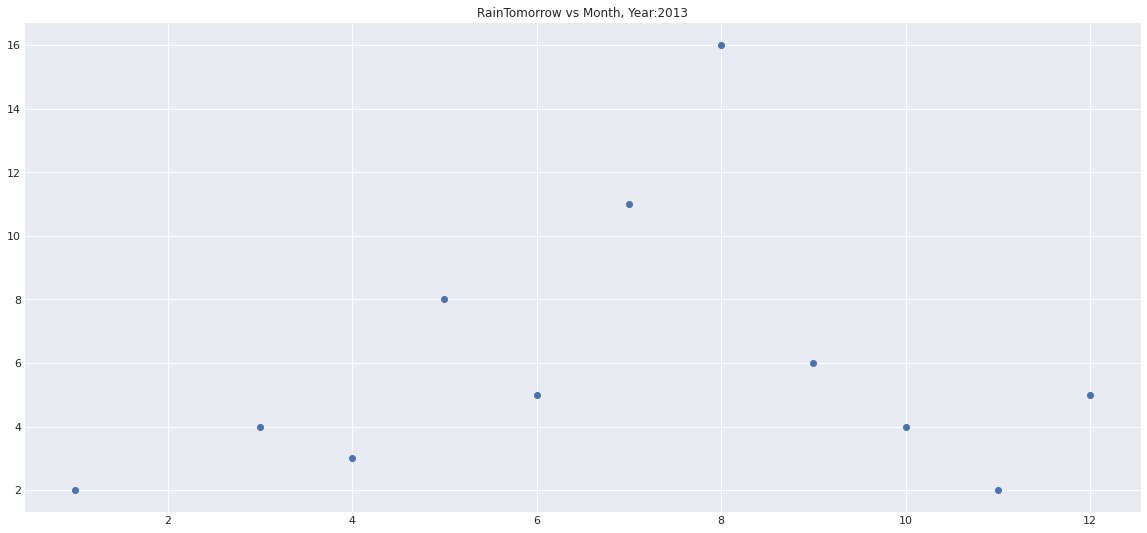

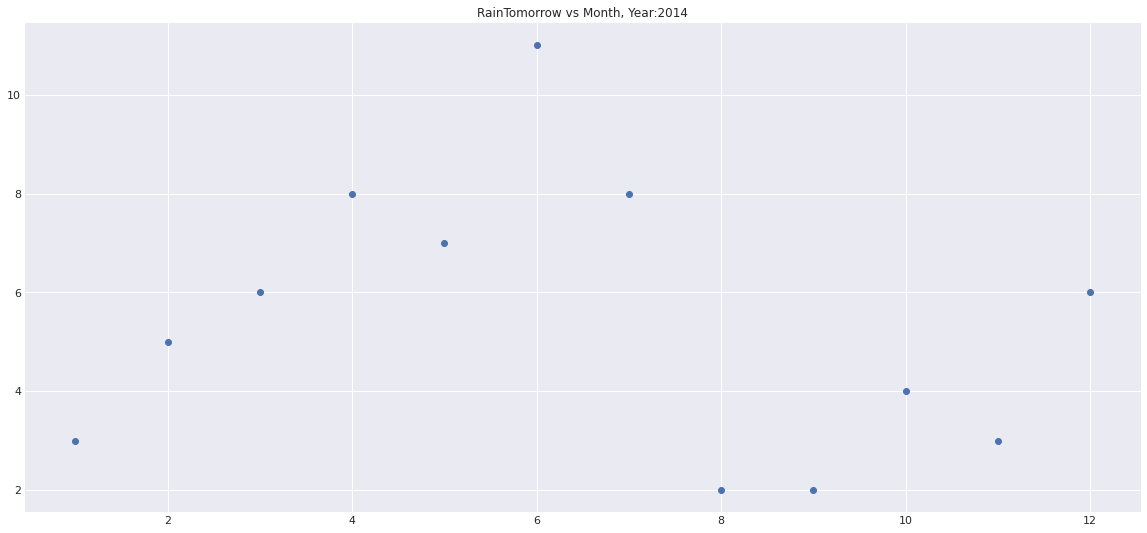

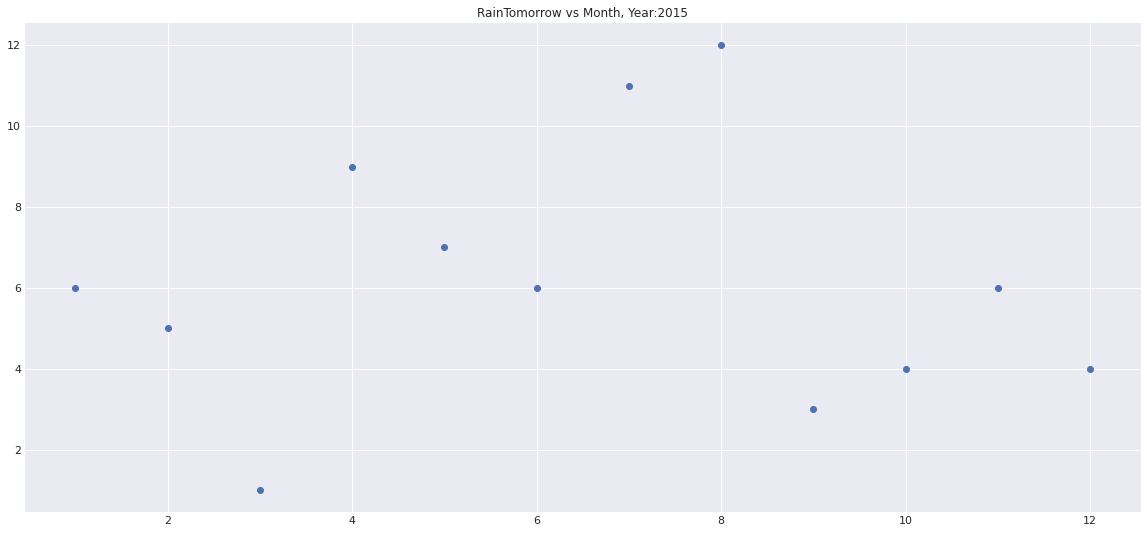

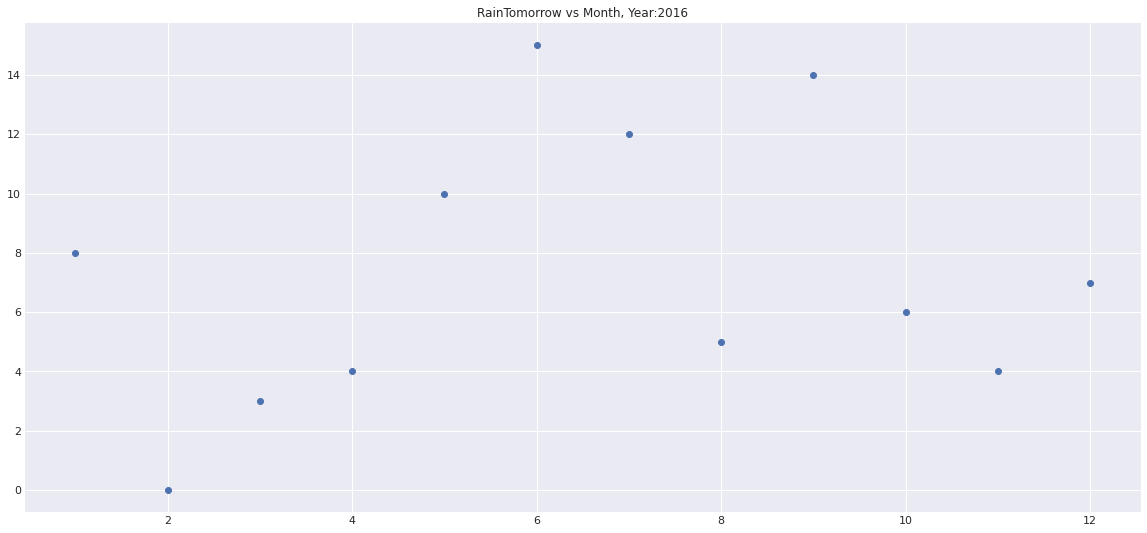

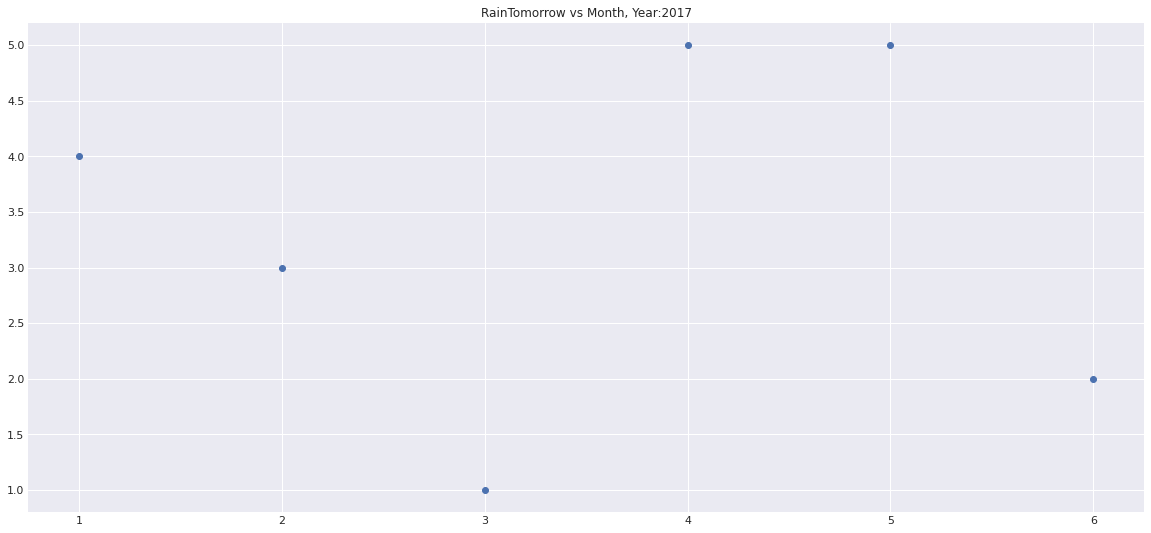

In [272]:
# Aplico granularidad de meses
df_aux = df_weather[['Date','RainTomorrow']][df_weather['Location']=='Albury']
df_aux['Year']=df_weather[df_weather['Location']=='Albury']['Date'].astype(str).str[0:4]
df_aux['Month']=df_weather[df_weather['Location']=='Albury']['Date'].astype(str).str[5:7]
df_aux['RainTomorrow']=df_aux['RainTomorrow']=='Yes'
for years in df_aux['Year'].unique():
    x_axis = np.array(df_aux['Month'][df_aux['Year']==years].unique(),dtype='int')
    y_axis=np.array(df_aux[df_aux['Year']==years].groupby('Month')['RainTomorrow'].sum())
    plt.figure()
    plt.scatter(x_axis,y_axis)
    plt.title('RainTomorrow vs Month, Year:' + years)
    plt.show()

En la gráfica anterior, pareciera que existe una pequeña relación entre los meses del año y la "probabilidad" de lluvia. 

Entonces, de la fecha mantendremos únicamente el mes. Podemos realizar varias codificaciones del mes, como primer aporximación mantendremos su valor numérico. En el caso del año, la problemática que tenemos es que si ponemos los modelos a ejecutarse con datos nuevos, el año siempre tendrá valores no utilizados en el entrenamiento.

#### Columna Location

In [273]:
df_weather['Location'].describe()

count       145460
unique          49
top       Canberra
freq          3436
Name: Location, dtype: object

In [274]:
df_weather.groupby('Location')['Location'].count()

Location
Adelaide            3193
Albany              3040
Albury              3040
AliceSprings        3040
BadgerysCreek       3009
Ballarat            3040
Bendigo             3040
Brisbane            3193
Cairns              3040
Canberra            3436
Cobar               3009
CoffsHarbour        3009
Dartmoor            3009
Darwin              3193
GoldCoast           3040
Hobart              3193
Katherine           1578
Launceston          3040
Melbourne           3193
MelbourneAirport    3009
Mildura             3009
Moree               3009
MountGambier        3040
MountGinini         3040
Newcastle           3039
Nhil                1578
NorahHead           3004
NorfolkIsland       3009
Nuriootpa           3009
PearceRAAF          3009
Penrith             3039
Perth               3193
PerthAirport        3009
Portland            3009
Richmond            3009
Sale                3009
SalmonGums          3001
Sydney              3344
SydneyAirport       3009
Townsville      

La columna Location es del tipo Categorica Nominal con una cardinalidad elevada. También vemos que prácticamente todas las ciudades estan representadas, por lo que no podemos aplicar técnicas de codificación de etiquetas poco frecuentes.

Analizamos si es de interes para la salida

In [275]:
def myplot_categorical(series):
    categorical_series=df_weather[df_weather['RainTomorrow']=='Yes'].groupby(series)['RainTomorrow'].\
                            count() / df_weather.groupby(series)['RainTomorrow'].count()
    categorical_series=categorical_series.sort_values()

    fig, ax = plt.subplots()
    plt.xticks(range(0,categorical_series.index.shape[0]), categorical_series.index, rotation=90)
    ax.bar(range(0,categorical_series.index.shape[0]), categorical_series, color='blue')
    plt.title('Porcentaje de dias lluviosos (2008-2017)')
    ax.set_ylabel('Dias')
    ax.set_xlabel(series)
    plt.show()

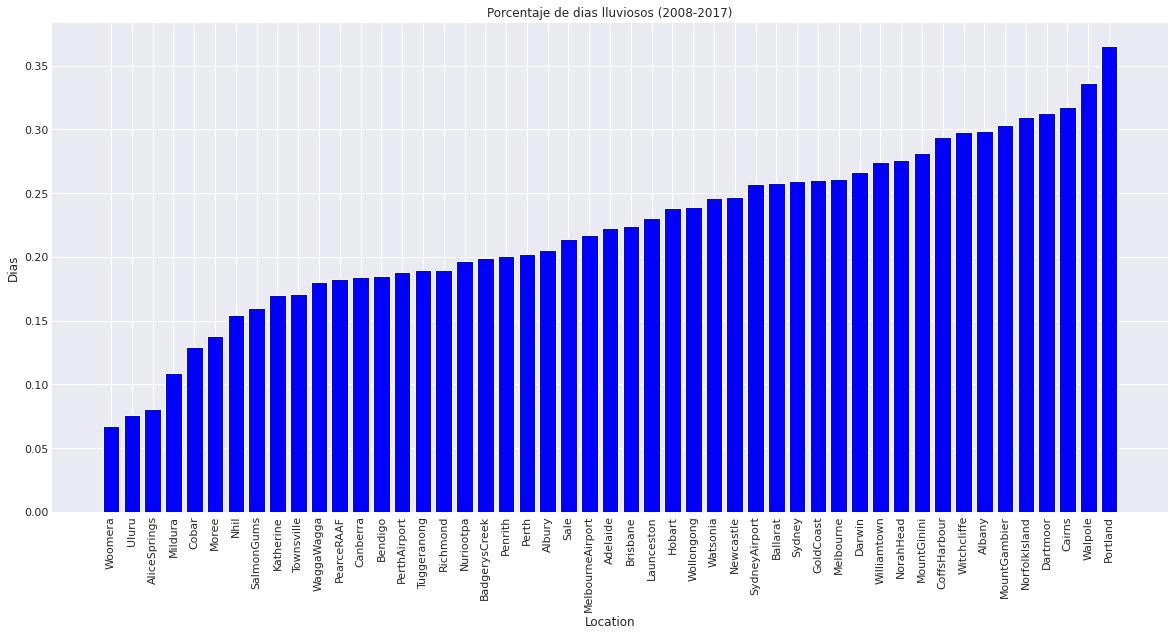

In [276]:
myplot_categorical('Location')

Notamos que existe una relación entre la ciudad y la probabilidad que llueva. Se concluye que es necesario incluir esta variable.

En cuanto a como considerarla, aplicar one hot encoding en este caso no sería recomendable por la alta cardinalidad. Se considera que es mas apropiado aplicar ordinal encoding con orden o peso de evidencia.


#### Columna MinTemp

In [277]:
df_weather['MinTemp'].describe()

count    143975.000000
mean         12.194034
std           6.398495
min          -8.500000
25%           7.600000
50%          12.000000
75%          16.900000
max          33.900000
Name: MinTemp, dtype: float64

Es una variable del tipo numérica, punto flotante en específico, con valores positivos y negativos. 
Graficamos distribución (sin contar Na)

In [278]:
def myplot_statistics(series):
    numerical_series=df_weather[series][-df_weather[series].isnull()]
    fig,axes = plt.subplots()
    sns.distplot(numerical_series, bins=20).set_title('Values distribution')   
    plt.axvline(np.mean(numerical_series),color='red',label='Mean')
    plt.axvline(np.median(numerical_series),color='green',label='Median')
    plt.axvline(stat.mode(numerical_series),color='orange',label='Mode')
    plt.legend()

    fig,axes = plt.subplots()
    sns.boxplot(y=numerical_series)
    axes.set_title('Box&Whiskers')
    
    # Chequeamos outliers
    q25, q75 = np.percentile(numerical_series, 25), np.percentile(numerical_series, 75)
    iqr = q75 - q25
    cutoff = iqr * 1.5
    lower,upper = q25-cutoff, q75+cutoff
    print("Lower bound: {}".format(lower))
    print("Upper bound: {}".format(upper))
    print("Outliers: {}".format(np.sum(numerical_series<lower)+np.sum(numerical_series>upper)))
    print("% Outliers: {}".format((np.sum(numerical_series<lower)+np.sum(numerical_series>upper))*100 / \
                                  numerical_series.shape[0]))

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: -6.35
Upper bound: 30.849999999999998
Outliers: 54
% Outliers: 0.0375065115471436


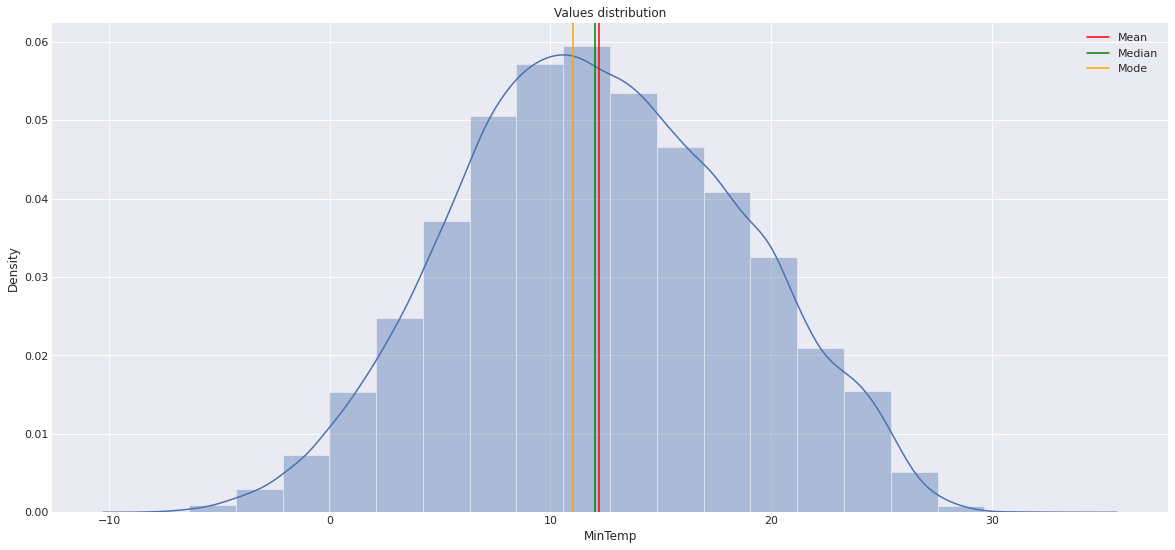

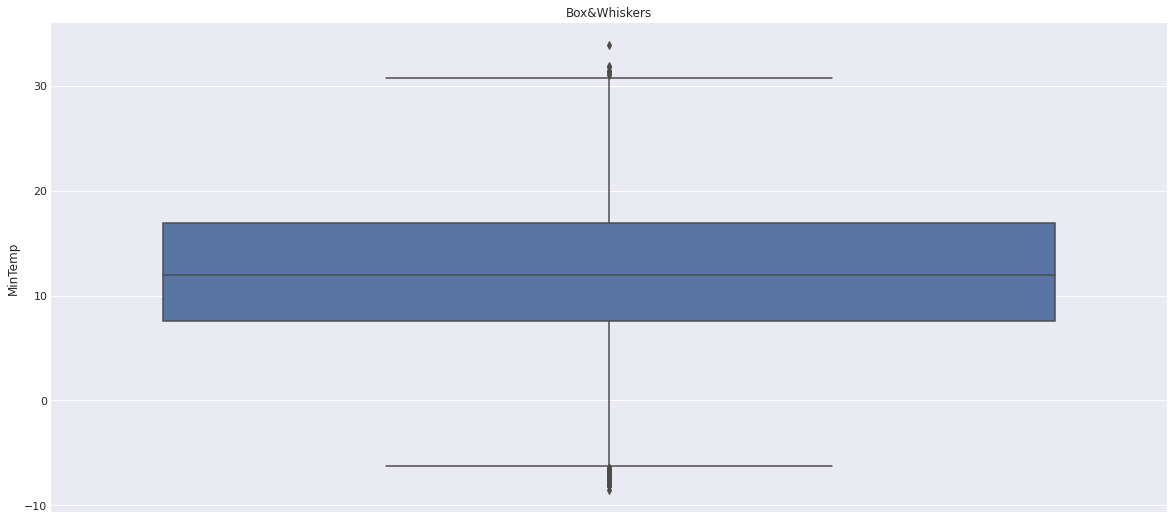

In [279]:
myplot_statistics('MinTemp')

Observamos que tiene una distribución muy cercana a una gaussiana, con una pequeña oblicuidad hacia la derecha. Se observan pocos outliers. 

#### Columna MaxTemp

In [280]:
df_weather['MaxTemp'].describe()

count    144199.000000
mean         23.221348
std           7.119049
min          -4.800000
25%          17.900000
50%          22.600000
75%          28.200000
max          48.100000
Name: MaxTemp, dtype: float64

Es una variable del tipo numérica, punto flotante en específico, con valores positivos y negativos. 
Graficamos distribución (sin contar Na)

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: 2.4499999999999975
Upper bound: 43.65
Outliers: 489
% Outliers: 0.3391146956636315


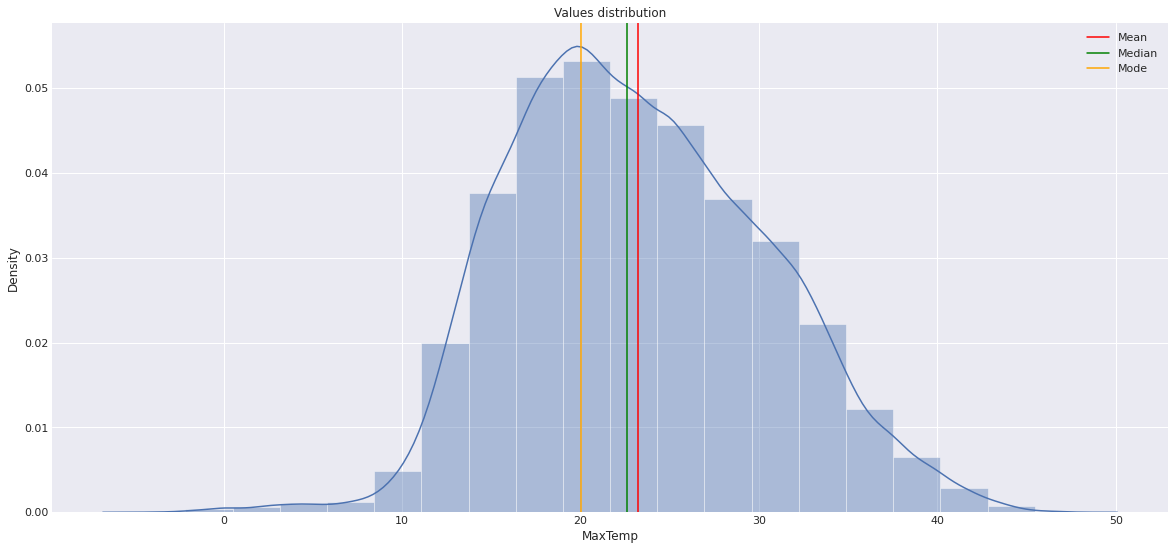

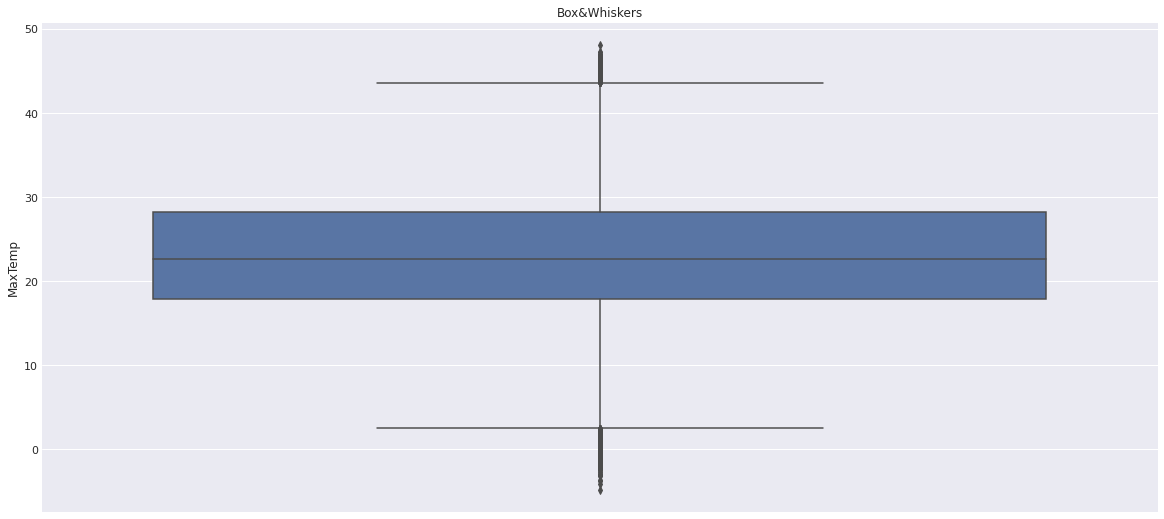

In [281]:
myplot_statistics('MaxTemp')

En este caso la distribución es mas irregular, con mayor oblicuidad hacia la derecha. Se observa poca cantidad de outliers. 

#### Columna Rainfall

In [282]:
df_weather['Rainfall'].describe()

count    142199.000000
mean          2.360918
std           8.478060
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: Rainfall, dtype: float64

Es una variable del tipo numérica, punto flotante en específico, con una distribución inusual 
Graficamos distribución (sin contar Na)

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: -1.2000000000000002
Upper bound: 2.0
Outliers: 25578
% Outliers: 17.98746826630286


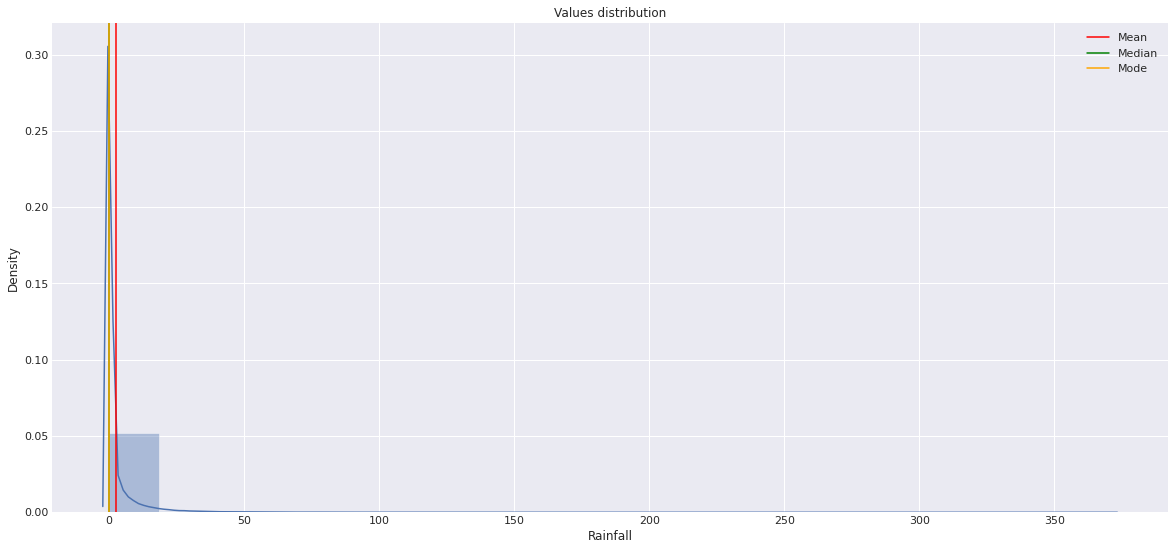

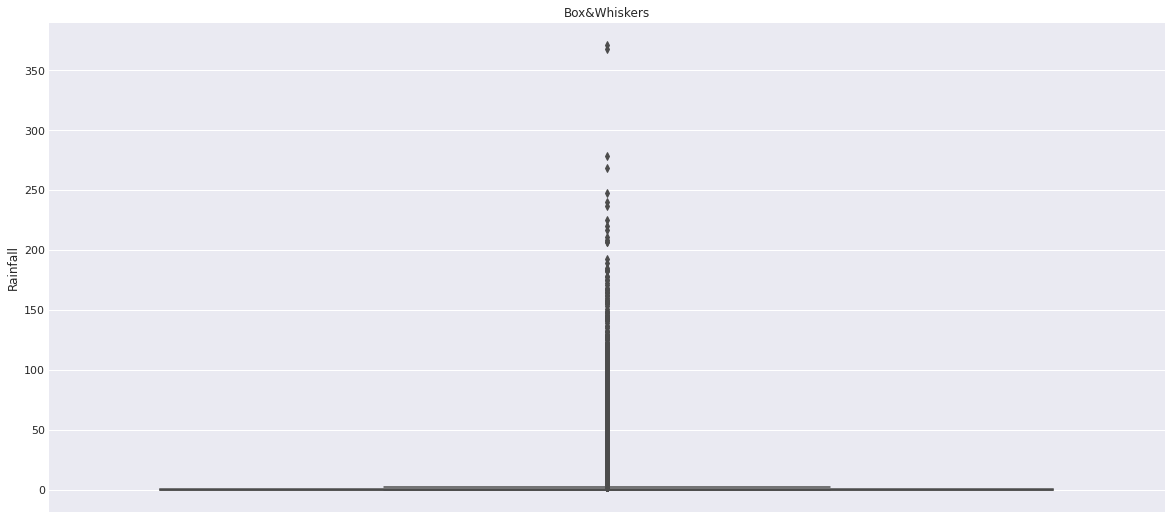

In [283]:
myplot_statistics('Rainfall')

En este caso la distribución es extremadamente irregular. Con mucha variacion entre valores. Podría ser beneficioso aplicar una transformación

#### Evaporation

In [284]:
df_weather['Evaporation'].describe()

count    82670.000000
mean         5.468232
std          4.193704
min          0.000000
25%          2.600000
50%          4.800000
75%          7.400000
max        145.000000
Name: Evaporation, dtype: float64

Es una variable del tipo numérica, punto flotante en específico, con valores positivos. 
Graficamos distribución (sin contar Na)

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: -4.600000000000001
Upper bound: 14.600000000000001
Outliers: 1995
% Outliers: 2.4132091447925488


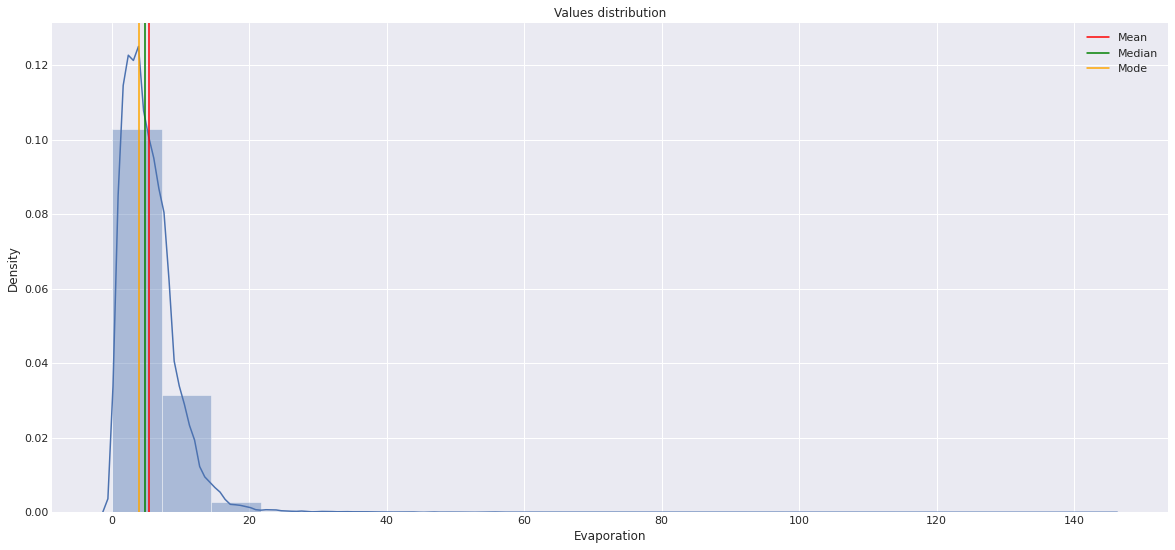

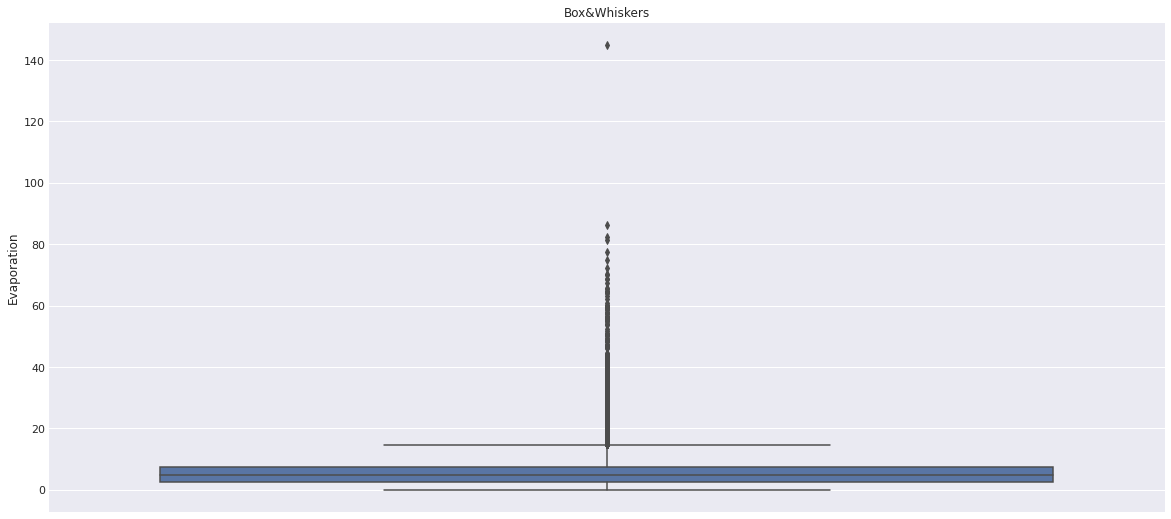

In [285]:
myplot_statistics('Evaporation')

Nuevamente la distribución tiene una forma irregular. Podríamos aplicar transformación.

#### Sunshine

In [286]:
df_weather['Sunshine'].describe()

count    75625.000000
mean         7.611178
std          3.785483
min          0.000000
25%          4.800000
50%          8.400000
75%         10.600000
max         14.500000
Name: Sunshine, dtype: float64

Sunshine es una variable del tipo punto flotante. Graficamos su distribución.

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: -3.8999999999999995
Upper bound: 19.299999999999997
Outliers: 0
% Outliers: 0.0


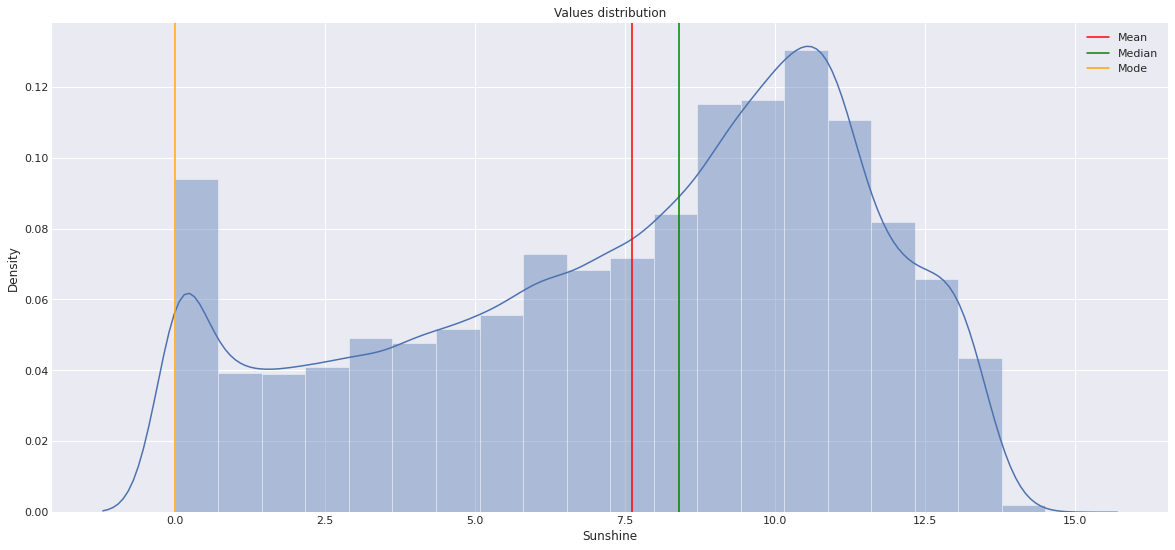

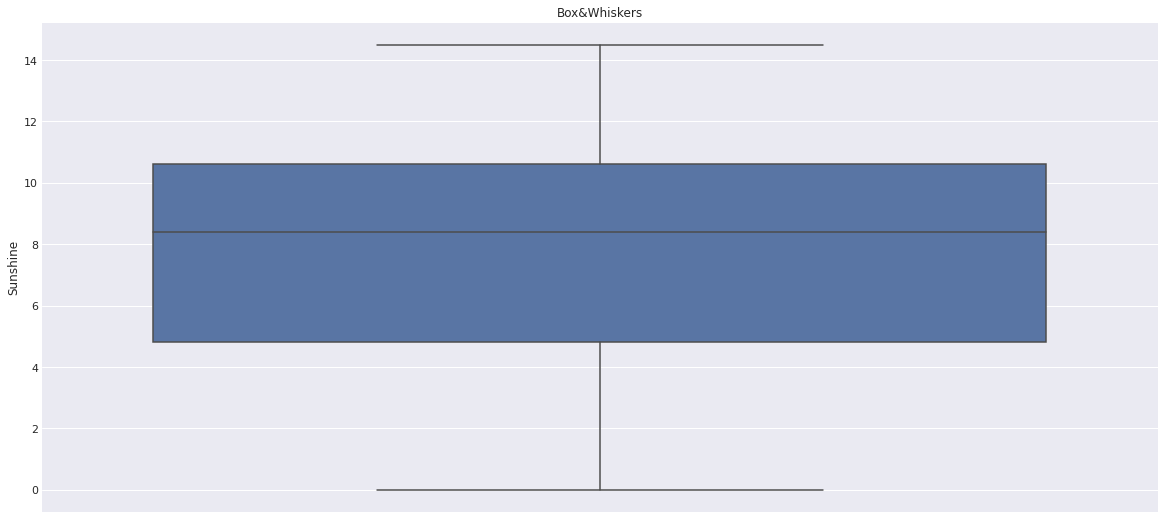

In [287]:
myplot_statistics('Sunshine')

#### WindGustDir | WindDir9am | WindDir3pm

In [288]:
print(df_weather['WindGustDir'].describe())
print(df_weather['WindDir9am'].describe())
print(df_weather['WindDir3pm'].describe())

count     135134
unique        16
top            W
freq        9915
Name: WindGustDir, dtype: object
count     134894
unique        16
top            N
freq       11758
Name: WindDir9am, dtype: object
count     141232
unique        16
top           SE
freq       10838
Name: WindDir3pm, dtype: object


In [289]:
print(df_weather.groupby('WindGustDir')['WindGustDir'].count())
print(df_weather.groupby('WindDir9am')['WindDir9am'].count())
print(df_weather.groupby('WindDir3pm')['WindDir3pm'].count())

WindGustDir
E      9181
ENE    8104
ESE    7372
N      9313
NE     7133
NNE    6548
NNW    6620
NW     8122
S      9168
SE     9418
SSE    9216
SSW    8736
SW     8967
W      9915
WNW    8252
WSW    9069
Name: WindGustDir, dtype: int64
WindDir9am
E       9176
ENE     7836
ESE     7630
N      11758
NE      7671
NNE     8129
NNW     7980
NW      8749
S       8659
SE      9287
SSE     9112
SSW     7587
SW      8423
W       8459
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64
WindDir3pm
E       8472
ENE     7857
ESE     8505
N       8890
NE      8263
NNE     6590
NNW     7870
NW      8610
S       9926
SE     10838
SSE     9399
SSW     8156
SW      9354
W      10110
WNW     8874
WSW     9518
Name: WindDir3pm, dtype: int64


Las variables WindDir son del tipo categóricas nominales. Observamos que tiene una cardinalidad de 16 valores diferentes, y todos los valores estan representados. 
La podemos codificar con one-hot encoding, o bien con integer encoding dividiendo los 360° de direccion en cuadrantes sucesivos.

Graficamos su relación respecto a la salida para verificar.

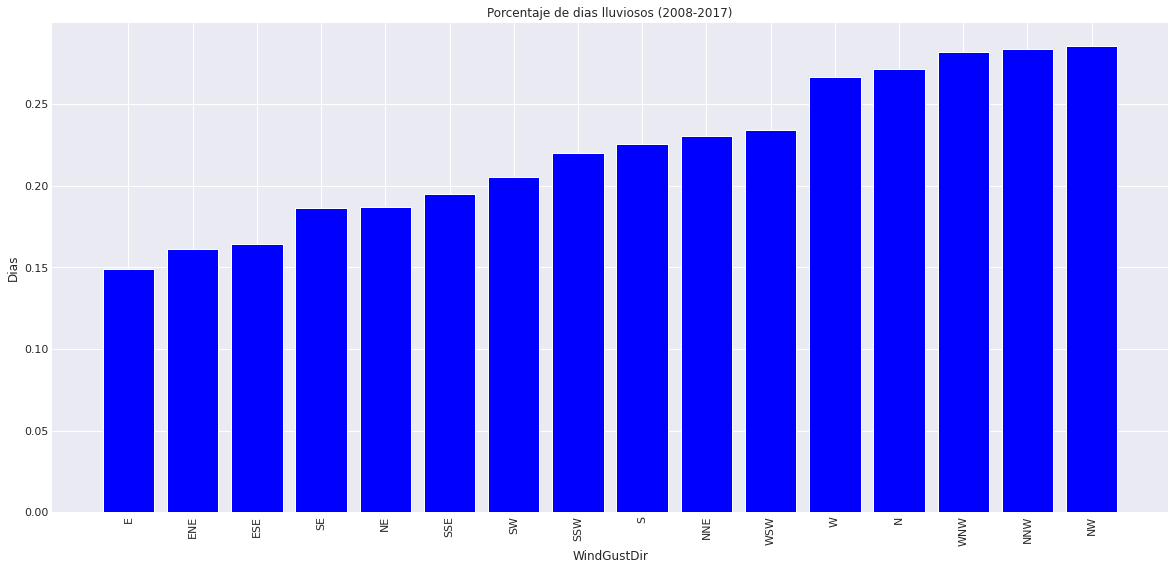

In [290]:
myplot_categorical('WindGustDir')

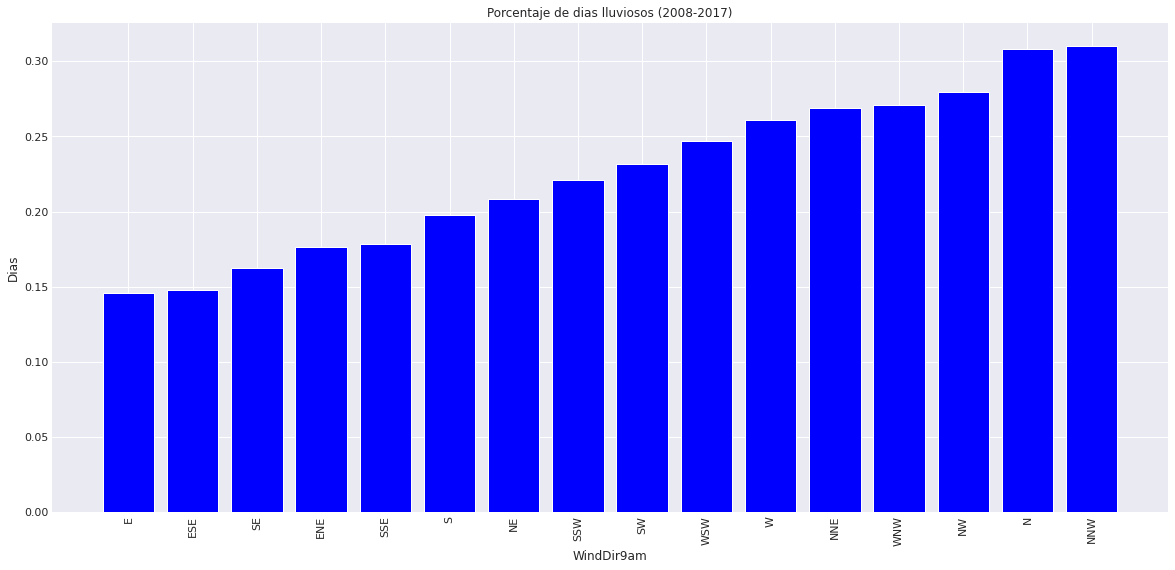

In [291]:
myplot_categorical('WindDir9am')

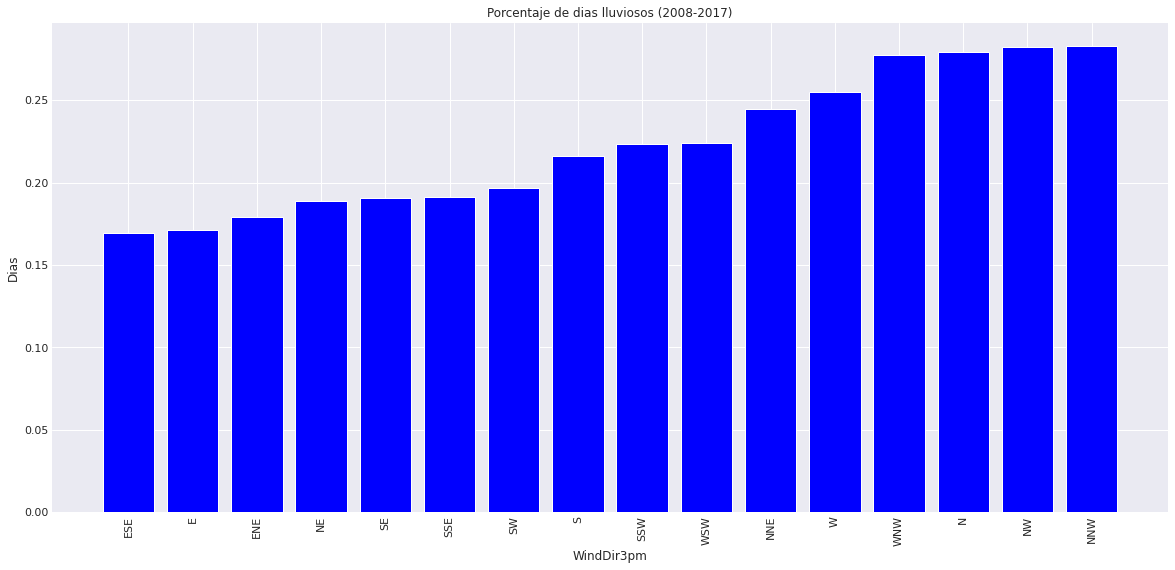

In [292]:
myplot_categorical('WindDir3pm')

#### WindGustSpeed | WindSpeed9am | WindSpeed3pm 

In [293]:
print(df_weather['WindGustSpeed'].describe())
print(df_weather['WindSpeed9am'].describe())
print(df_weather['WindSpeed3pm'].describe())

count    135197.000000
mean         40.035230
std          13.607062
min           6.000000
25%          31.000000
50%          39.000000
75%          48.000000
max         135.000000
Name: WindGustSpeed, dtype: float64
count    143693.000000
mean         14.043426
std           8.915375
min           0.000000
25%           7.000000
50%          13.000000
75%          19.000000
max         130.000000
Name: WindSpeed9am, dtype: float64
count    142398.000000
mean         18.662657
std           8.809800
min           0.000000
25%          13.000000
50%          19.000000
75%          24.000000
max          87.000000
Name: WindSpeed3pm, dtype: float64


Es una variable del tipo numérica. Verificamos su distribución.

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: 5.5
Upper bound: 73.5
Outliers: 3092
% Outliers: 2.2870329962942963


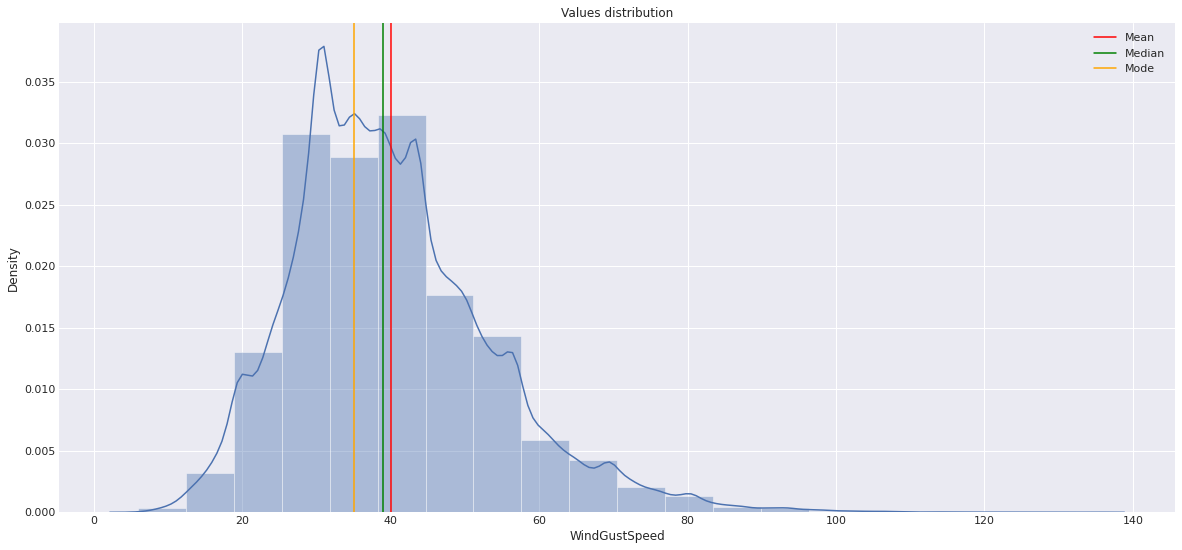

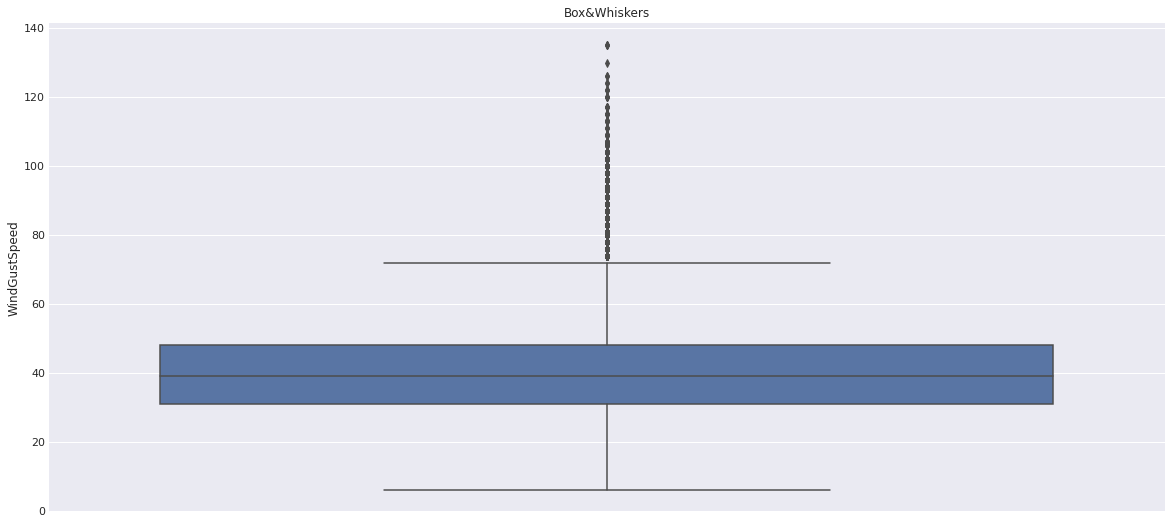

In [294]:
myplot_statistics('WindGustSpeed')

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: -11.0
Upper bound: 37.0
Outliers: 1817
% Outliers: 1.264501402295171


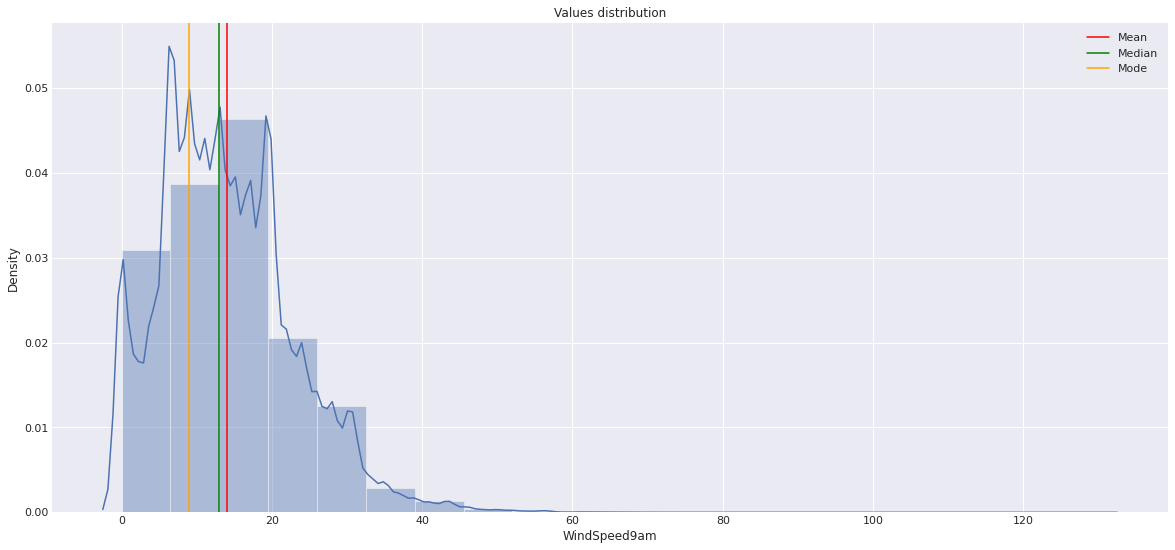

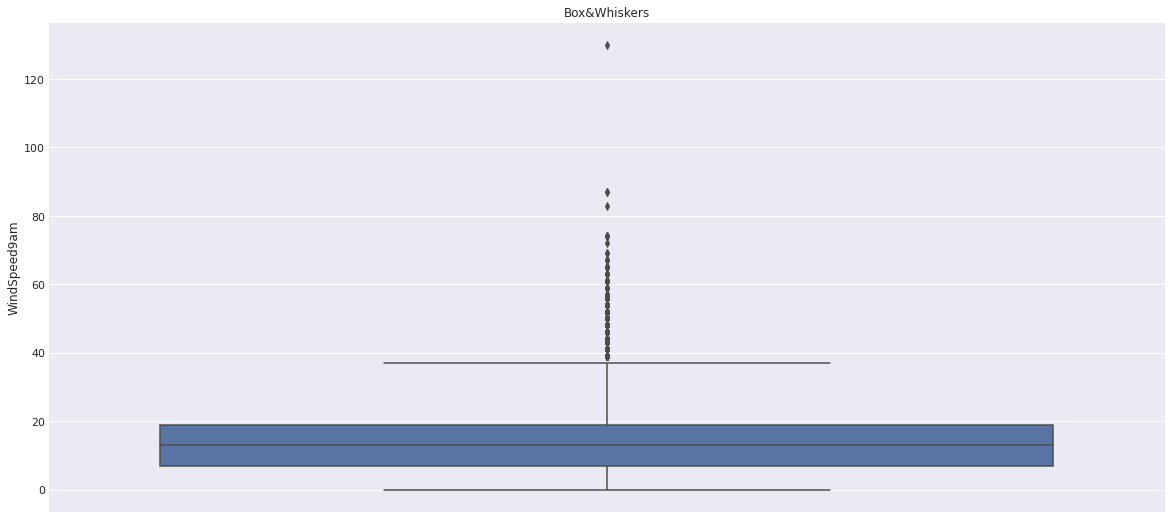

In [295]:
myplot_statistics('WindSpeed9am')

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: -3.5
Upper bound: 40.5
Outliers: 2523
% Outliers: 1.7717945476762313


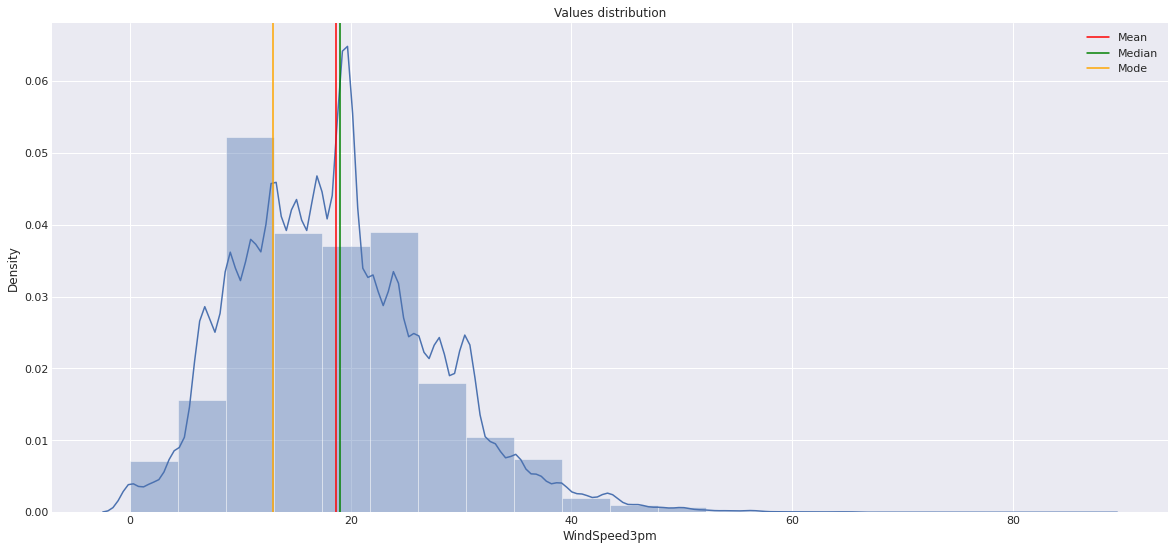

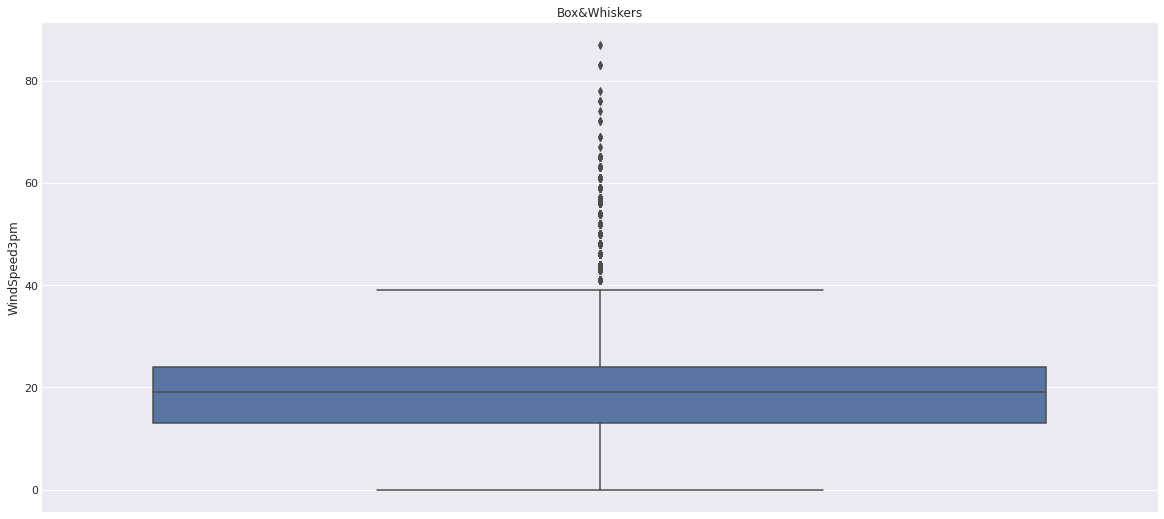

In [296]:
myplot_statistics('WindSpeed3pm')

 Las distribuciones son irregulares pero con una tendencia a ser gaussianas.

#### Humidity9am | Humidity3pm

In [297]:
print(df_weather['Humidity9am'].describe())
print(df_weather['Humidity3pm'].describe())

count    142806.000000
mean         68.880831
std          19.029164
min           0.000000
25%          57.000000
50%          70.000000
75%          83.000000
max         100.000000
Name: Humidity9am, dtype: float64
count    140953.000000
mean         51.539116
std          20.795902
min           0.000000
25%          37.000000
50%          52.000000
75%          66.000000
max         100.000000
Name: Humidity3pm, dtype: float64


Las humedades son del tipo numérica de punto flotante. Verificamos su distribución.

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: 18.0
Upper bound: 122.0
Outliers: 1425
% Outliers: 0.9978572328893744


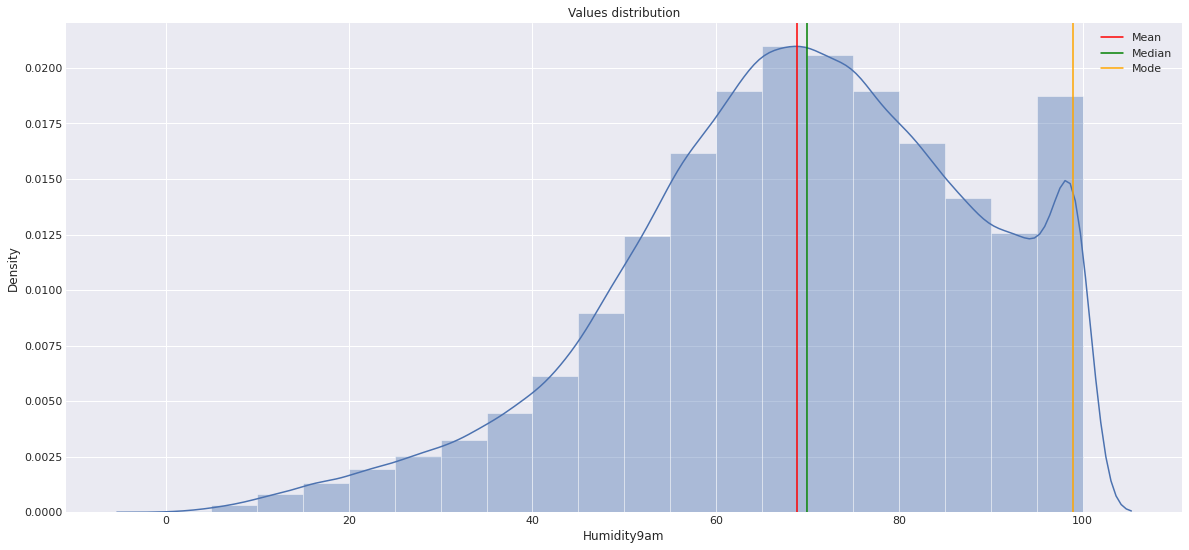

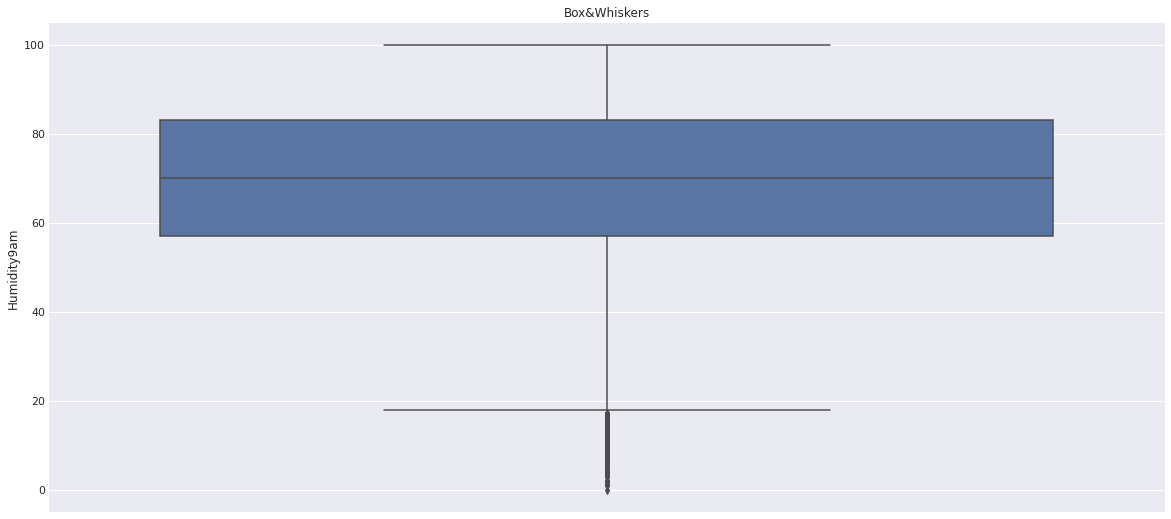

In [298]:
myplot_statistics('Humidity9am')

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: -6.5
Upper bound: 109.5
Outliers: 0
% Outliers: 0.0


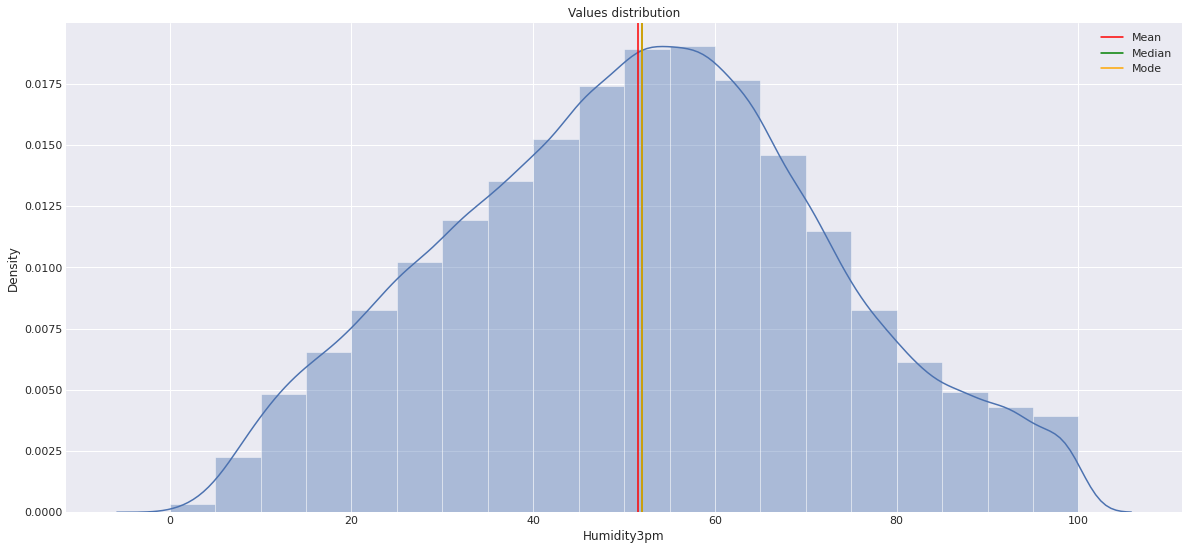

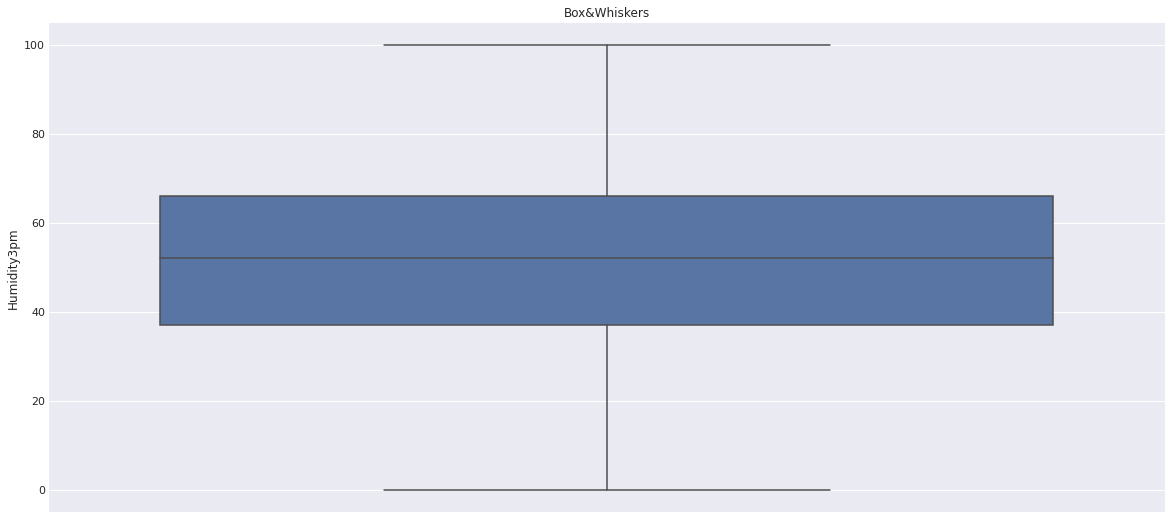

In [299]:
myplot_statistics('Humidity3pm')

Observamos distribuciones bastante regulares (excepto por la presencia de gran cantidad de picos de alta humedad a las 9am) y con poca presencia de outliers.

#### Pressure9am | Pressure3pm

In [300]:
print(df_weather['Pressure9am'].describe())
print(df_weather['Pressure3pm'].describe())

count    130395.00000
mean       1017.64994
std           7.10653
min         980.50000
25%        1012.90000
50%        1017.60000
75%        1022.40000
max        1041.00000
Name: Pressure9am, dtype: float64
count    130432.000000
mean       1015.255889
std           7.037414
min         977.100000
25%        1010.400000
50%        1015.200000
75%        1020.000000
max        1039.600000
Name: Pressure3pm, dtype: float64


Las presiones son variables de tipo numéricas. Graficamos su distribución.

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: 998.65
Upper bound: 1036.65
Outliers: 1191
% Outliers: 0.9133785804670425


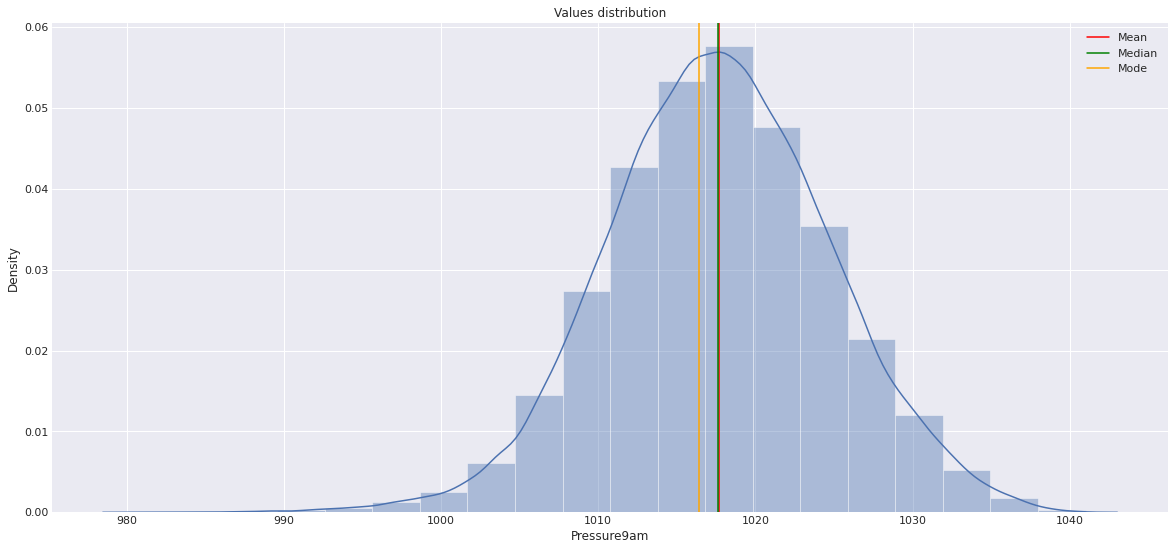

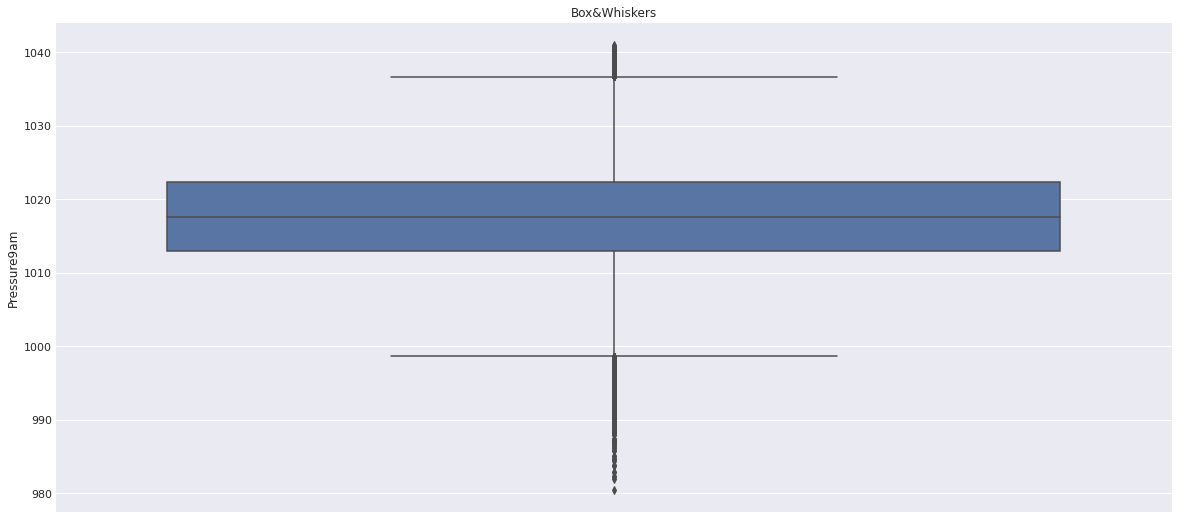

In [301]:
myplot_statistics('Pressure9am')

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: 996.0
Upper bound: 1034.4
Outliers: 919
% Outliers: 0.7045816977428851


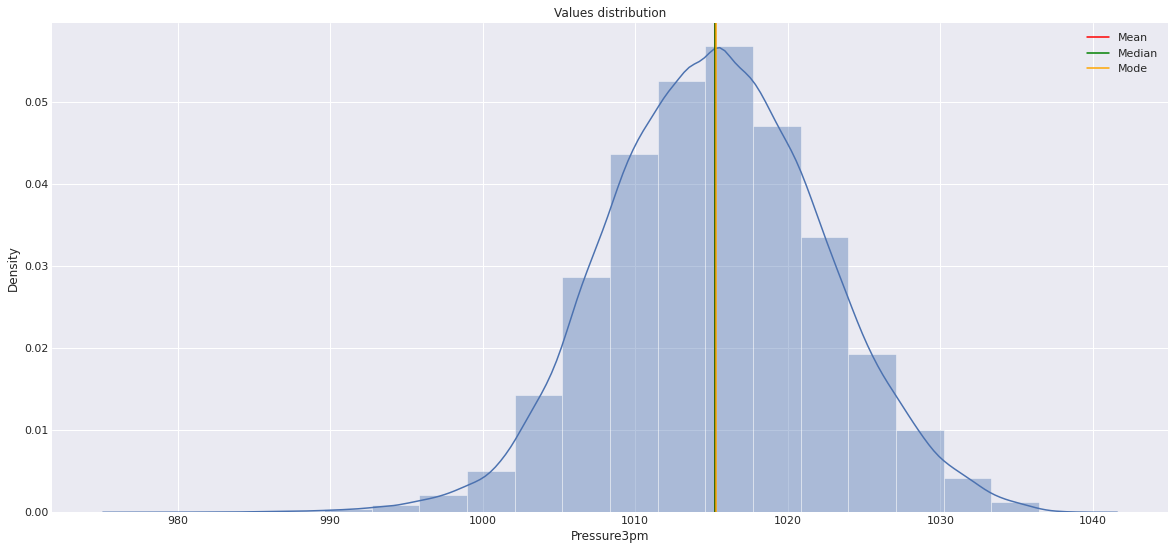

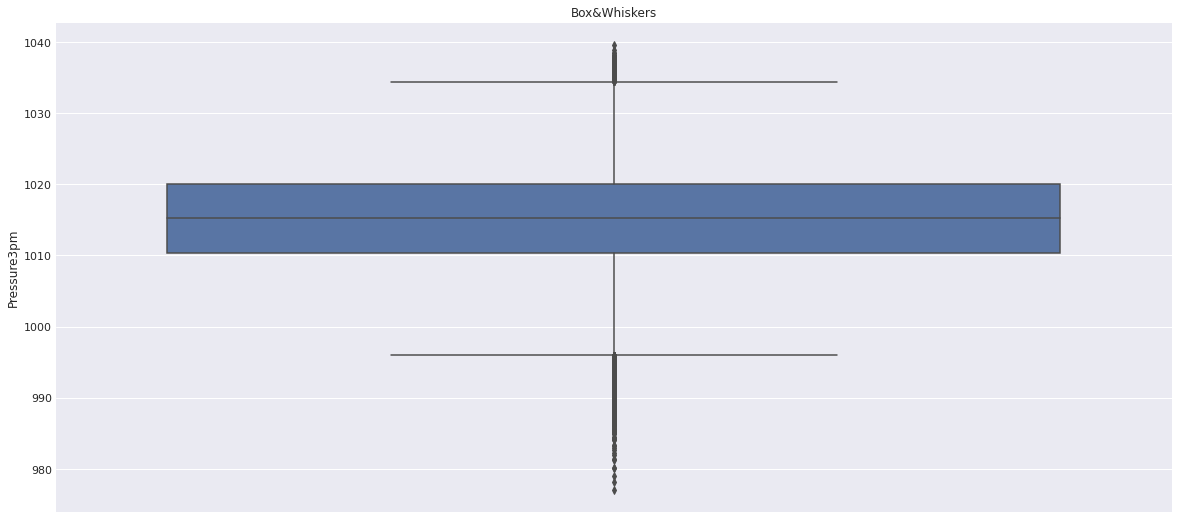

In [302]:
myplot_statistics('Pressure3pm')

Observamos distribuciones muy similares a gaussianas con poca presencia de outliers.

#### Cloud9am | Cloud3pm

In [303]:
print(df_weather['Cloud9am'].describe())
print(df_weather['Cloud3pm'].describe())

count    89572.000000
mean         4.447461
std          2.887159
min          0.000000
25%          1.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Cloud9am, dtype: float64
count    86102.000000
mean         4.509930
std          2.720357
min          0.000000
25%          2.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Cloud3pm, dtype: float64


Las variables clouds son del tipo numérica enteras. Graficamos su distribución.

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: -8.0
Upper bound: 16.0
Outliers: 0
% Outliers: 0.0


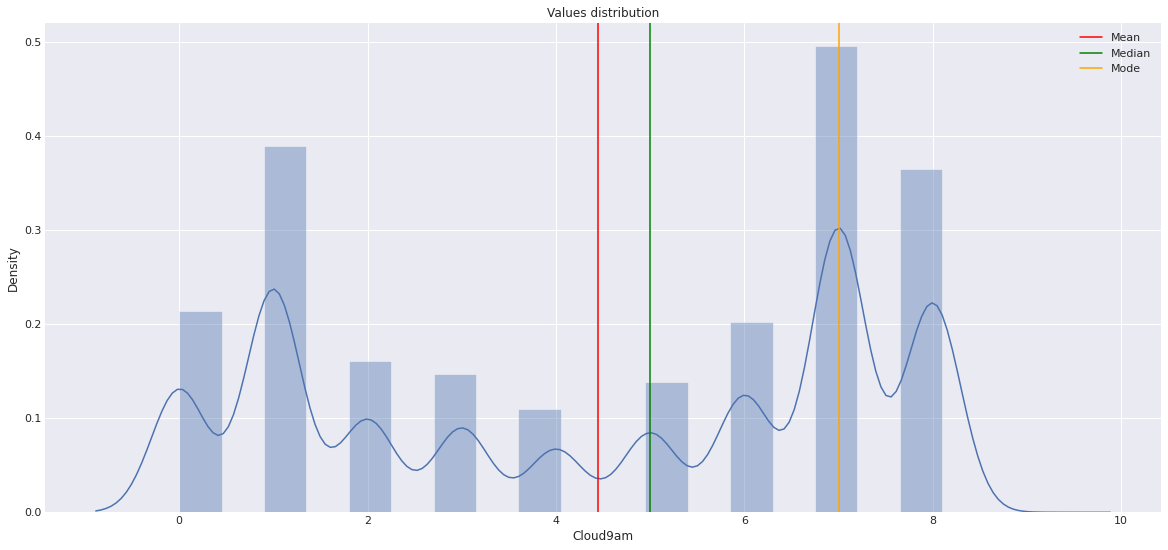

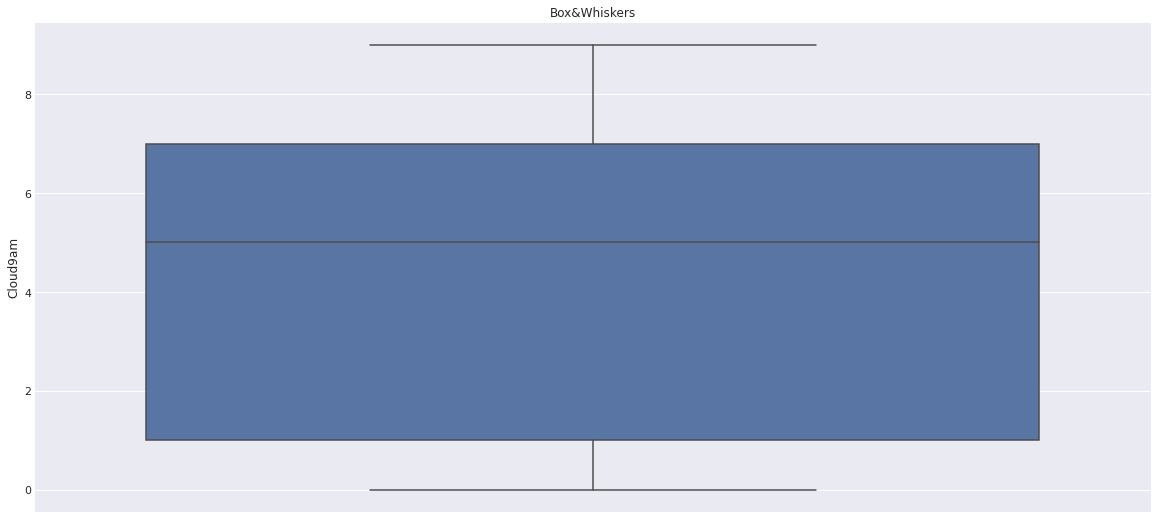

In [304]:
myplot_statistics('Cloud9am')

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: -5.5
Upper bound: 14.5
Outliers: 0
% Outliers: 0.0


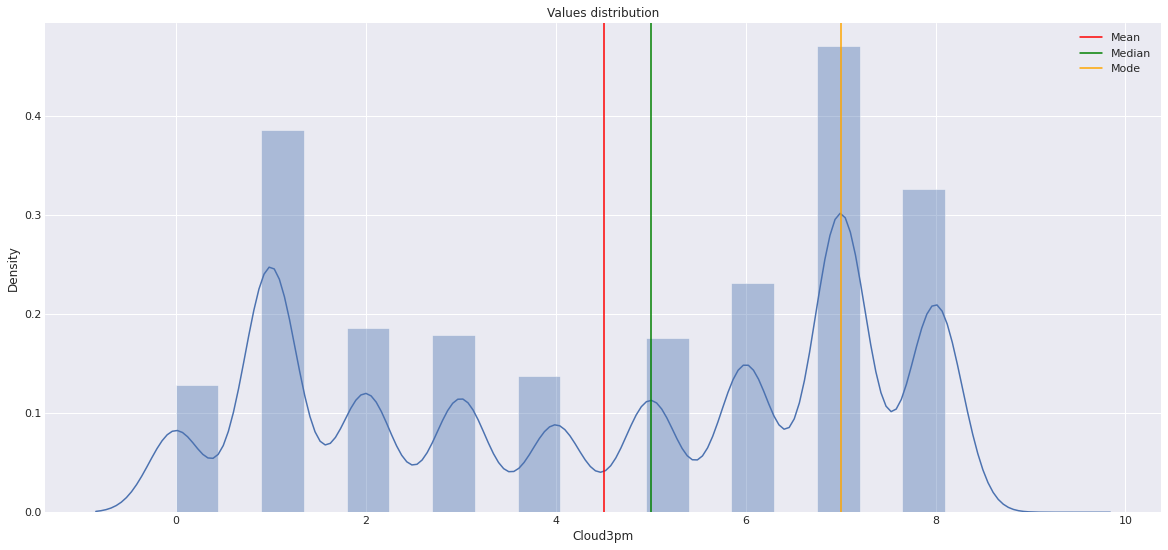

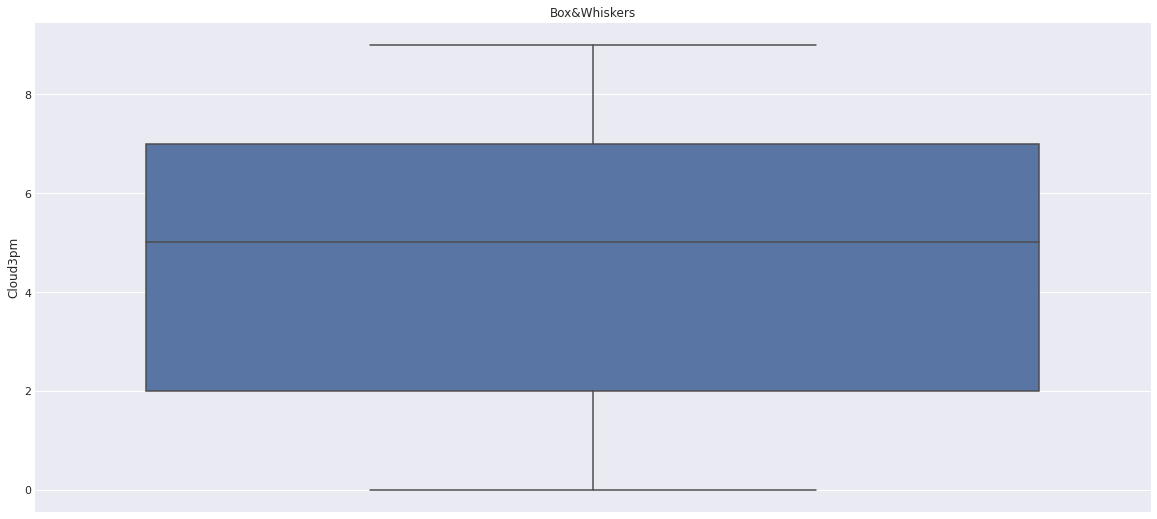

In [305]:
myplot_statistics('Cloud3pm')

Observamos distribuciones del tipo bimodal con dos picos en 1 y 8.

#### Temp9am | Temp3pm

In [306]:
print(df_weather['Temp9am'].describe())
print(df_weather['Temp3pm'].describe())

count    143693.000000
mean         16.990631
std           6.488753
min          -7.200000
25%          12.300000
50%          16.700000
75%          21.600000
max          40.200000
Name: Temp9am, dtype: float64
count    141851.00000
mean         21.68339
std           6.93665
min          -5.40000
25%          16.60000
50%          21.10000
75%          26.40000
max          46.70000
Name: Temp3pm, dtype: float64


Las temperaturas son variables del tipo numérica de punto flotante. Graficamos su distribución.

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: -1.6500000000000004
Upper bound: 35.550000000000004
Outliers: 262
% Outliers: 0.18233316863034385


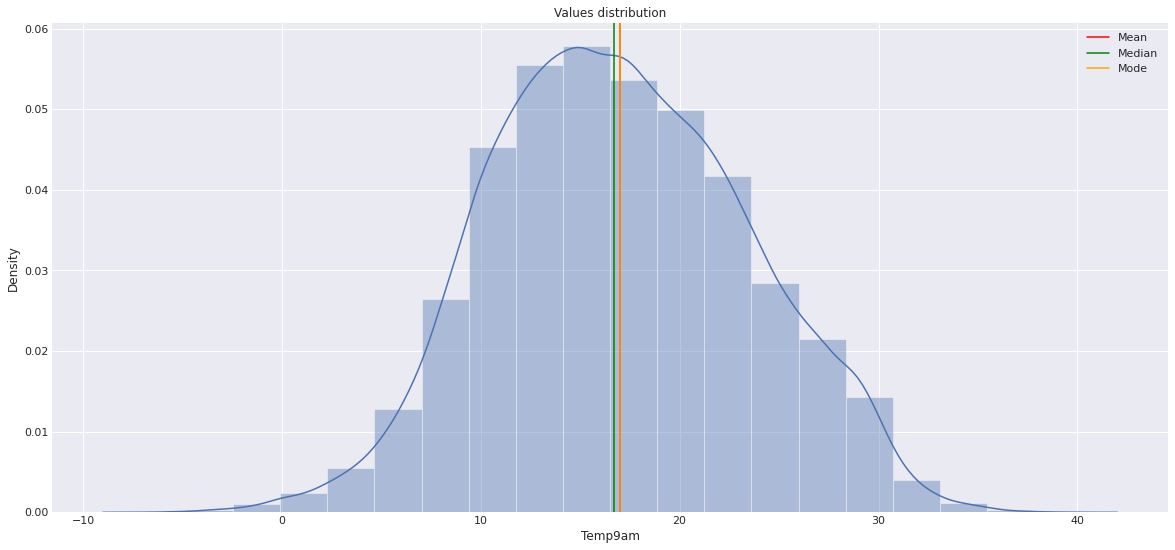

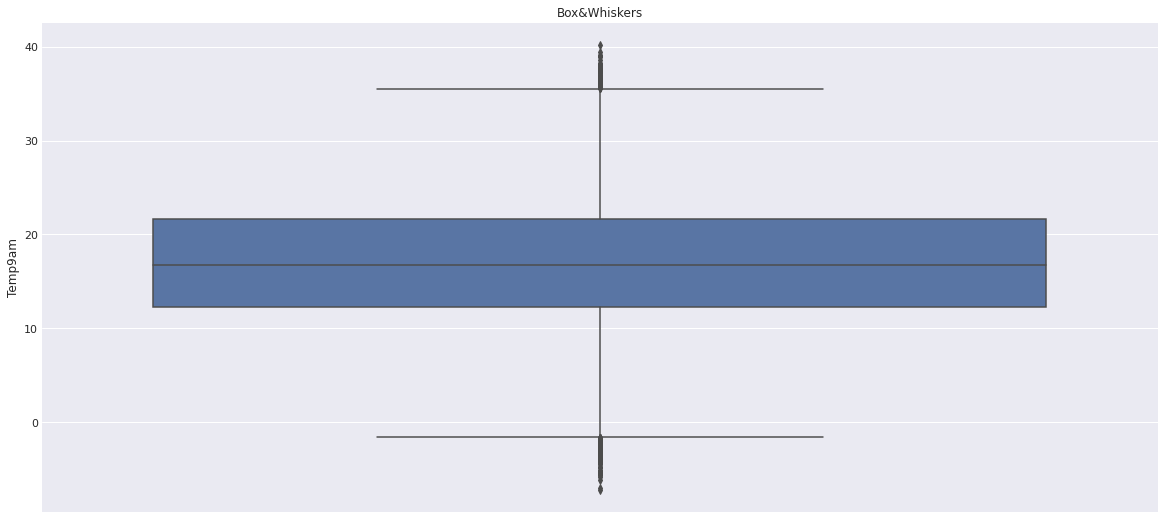

In [307]:
myplot_statistics('Temp9am')

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: 1.9000000000000057
Upper bound: 41.099999999999994
Outliers: 764
% Outliers: 0.5385933127013557


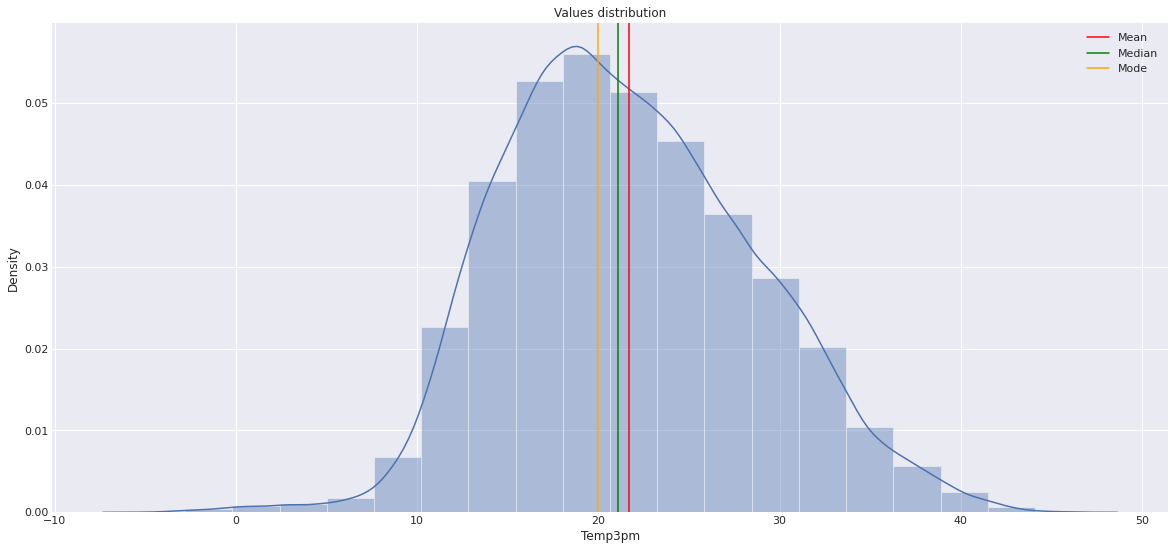

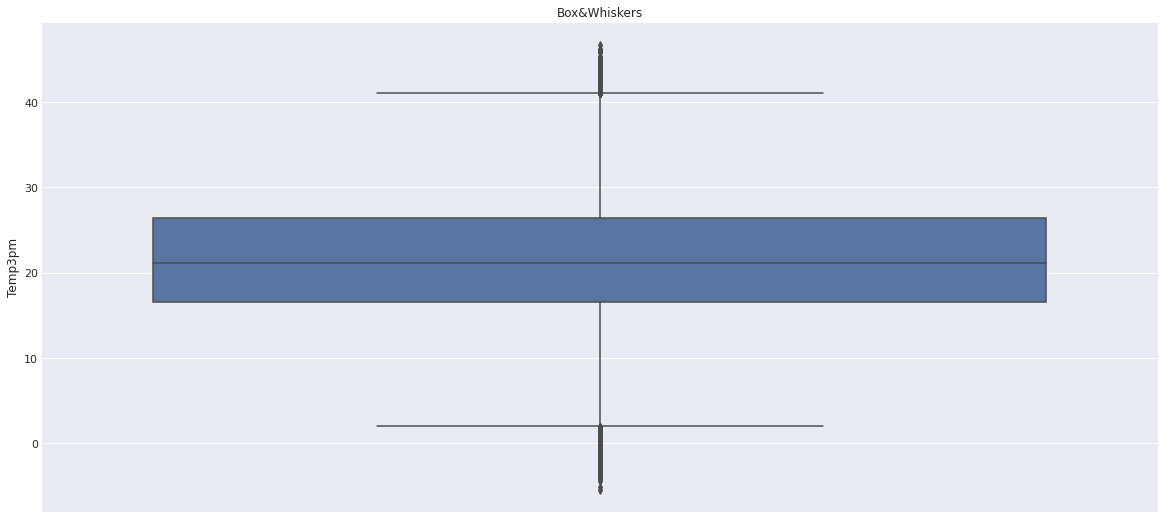

In [308]:
myplot_statistics('Temp3pm')

Observamos una distribución muy similar a la gaussiana con poca presencia de outliers.

#### RainToday

In [309]:
print(df_weather['RainToday'].describe())

count     142199
unique         2
top           No
freq      110319
Name: RainToday, dtype: object


In [310]:
print(df_weather.groupby('RainToday')['RainToday'].count())

RainToday
No     110319
Yes     31880
Name: RainToday, dtype: int64


RainToday es una variable categórica que representa un valor booleano. Podemos codificar No y Yes como 0 y 1 respectivamente.

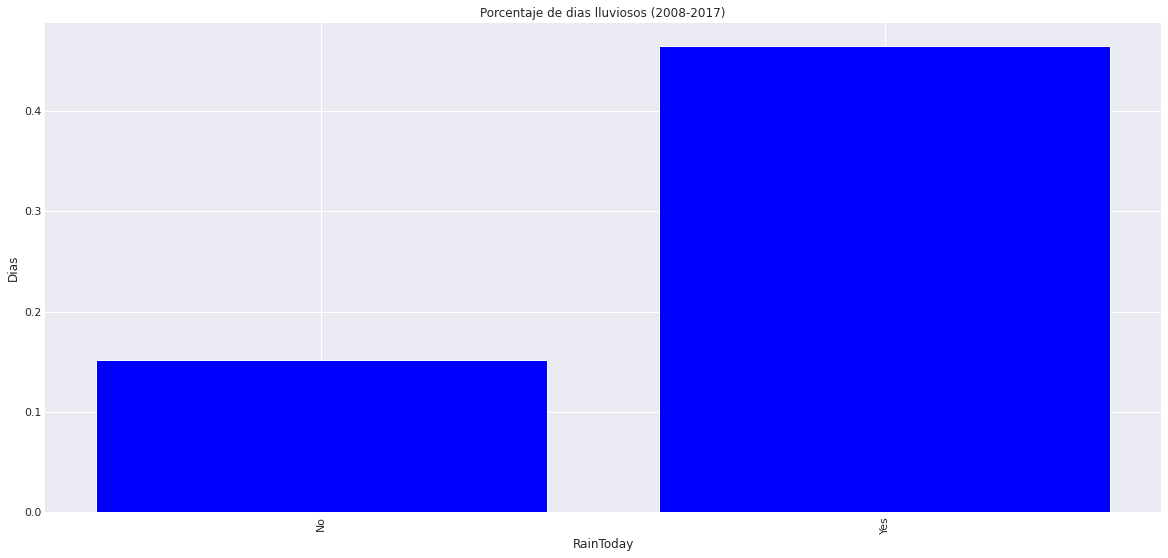

In [311]:
myplot_categorical('RainToday')

### Variable de Salida
#### RainTomorrow

In [312]:
df_weather['RainTomorrow'].describe()

count     142193
unique         2
top           No
freq      110316
Name: RainTomorrow, dtype: object

In [313]:
print(df_weather.groupby('RainTomorrow')['RainTomorrow'].count())

RainTomorrow
No     110316
Yes     31877
Name: RainTomorrow, dtype: int64


La variable de salida es RainTomorrow que es una variable categórica nominal representando una variable booleana. 

Notamos que las clases estan fuertemente desbalanceadas.

Codificaremos los 'No' y 'Yes' como 0 y 1 respectivamente.

-------------------------------------------------------------------------------------------------------
# 2- Esquema de validación de resultados

Particionaremos el dataset en entrenamiento y validación. También dejaremos una porción para realizar el testeo final del modelo. La partición se realizará 70% entrenamiento, 15% validacion, 15% testeo.

In [314]:
x = df_weather.drop('RainTomorrow',axis=1)
y = df_weather['RainTomorrow']

In [386]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.15, random_state=5)
x_train, x_valid, y_train, y_valid = train_test_split( x_train, y_train, test_size=0.176, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)
print(x_test.shape)
print(y_test.shape)

(101880, 22)
(101880,)
(21761, 22)
(21761,)
(21819, 22)
(21819,)


-------------------------------------------------------------------------------------------------------
# 3- Limpieza y preparacion de datos

## Datos Faltantes

Analizamos primero los datos faltantes, a que se debe y que técnicas de imputación podemos utilizar

In [316]:
df_weather.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [317]:
#En porcentaje
df_weather.isna().sum() / df_weather.shape[0] * 100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

Observamos excepto por date y location todas tienen datos faltantes. Revisamos una por una para evaluar el porque.

#### MinTemp

In [318]:
df_weather[df_weather['MinTemp'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
284,2009-09-11,Albury,NaN,18.8,NaN,NaN,NaN,N,31.0,SE,NNE,7.0,19.0,83.0,46.0,1022.2,1018.2,NaN,NaN,8.7,18.1,NaN,No
444,2010-02-18,Albury,NaN,31.2,NaN,NaN,NaN,ESE,31.0,SSE,SSW,7.0,7.0,33.0,24.0,1020.4,1019.1,NaN,NaN,21.0,30.0,NaN,No
453,2010-02-27,Albury,NaN,26.3,NaN,NaN,NaN,NE,26.0,SE,E,9.0,13.0,70.0,62.0,1019.4,1018.3,2.0,2.0,20.8,24.8,NaN,Yes
459,2010-03-05,Albury,NaN,22.3,0.0,NaN,NaN,NE,37.0,NE,NE,24.0,17.0,74.0,93.0,1008.8,1006.6,8.0,8.0,20.9,20.1,No,Yes
612,2010-08-05,Albury,NaN,11.8,NaN,NaN,NaN,WSW,28.0,N,WNW,2.0,19.0,97.0,65.0,1019.5,1018.3,7.0,4.0,6.7,11.3,NaN,No
984,2011-09-11,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
985,2011-09-12,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
986,2011-09-13,Albury,NaN,15.8,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,9.0,NaN,47.0,NaN,1023.9,NaN,5.0,NaN,15.1,NaN,NaN
1686,2013-10-11,Albury,NaN,18.5,NaN,NaN,NaN,W,37.0,W,WNW,17.0,17.0,73.0,52.0,1016.4,1015.8,NaN,1.0,11.4,17.8,NaN,No
2032,2014-09-22,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Primero se observa presencia de registros donde practicamente todos los valores son NaN. Estos registros deben ser fechas donde no se tomaron registros de ninguna variable, por lo que se eliminaran completamente. Chequeamos la cantidad de registros en estas condiciones

In [319]:
df_weather.drop(['Date','Location'],axis=1).isna().all(axis=1).sum()

182

En cuanto a los faltantes de MinTemp (fuera de los casos anteriores) los valores faltantes parecen ser del tipo MCAR. Al ser baja cantidad, podríamos descartar estos casos o aplicar imputación por mediana

#### MaxTemp

In [320]:
df_weather[df_weather['MaxTemp'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
283,2009-09-10,Albury,2.6,NaN,0.0,NaN,NaN,NaN,NaN,E,WNW,6.0,13.0,71.0,55.0,1017.8,1017.6,NaN,6.0,9.7,14.3,No,NaN
452,2010-02-26,Albury,17.2,NaN,0.0,NaN,NaN,NaN,NaN,NE,E,13.0,9.0,54.0,28.0,1024.6,1020.7,NaN,NaN,20.6,29.2,No,NaN
455,2010-03-01,Albury,14.4,NaN,0.0,NaN,NaN,NaN,NaN,SE,SSE,19.0,20.0,50.0,35.0,1018.5,1016.2,6.0,NaN,17.1,25.5,No,NaN
458,2010-03-04,Albury,15.1,NaN,0.0,NaN,NaN,NaN,NaN,SE,S,7.0,11.0,70.0,35.0,1014.2,1009.8,NaN,NaN,20.1,28.6,No,No
464,2010-03-10,Albury,8.8,NaN,0.0,NaN,NaN,NaN,NaN,SSE,SSE,9.0,11.0,69.0,35.0,1023.7,1023.0,NaN,1.0,12.5,21.8,No,NaN
983,2011-09-10,Albury,4.0,NaN,0.2,NaN,NaN,NaN,NaN,W,WSW,20.0,30.0,79.0,47.0,1015.9,1013.8,NaN,NaN,9.3,15.6,No,NaN
984,2011-09-11,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
985,2011-09-12,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1529,2013-05-07,Albury,3.9,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,72.0,NaN,1028.6,NaN,NaN,NaN,9.8,NaN,No,NaN
2031,2014-09-21,Albury,3.4,NaN,0.0,NaN,NaN,NaN,NaN,ESE,SSE,9.0,11.0,67.0,43.0,1030.6,1027.5,NaN,NaN,12.2,18.6,No,NaN


Al igual que antes, en MaxTemp los valores faltantes parecen ser del tipo MCAR. Al ser baja cantidad, podríamos descartar estos casos o aplicar imputación por mediana

#### Rainfall

In [321]:
df_weather[df_weather['Rainfall'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
15,2008-12-16,Albury,9.8,27.7,NaN,NaN,NaN,WNW,50.0,NaN,WNW,NaN,22.0,50.0,28.0,1013.4,1010.3,0.0,NaN,17.3,26.2,NaN,No
284,2009-09-11,Albury,NaN,18.8,NaN,NaN,NaN,N,31.0,SE,NNE,7.0,19.0,83.0,46.0,1022.2,1018.2,NaN,NaN,8.7,18.1,NaN,No
436,2010-02-10,Albury,21.7,35.6,NaN,NaN,NaN,SSW,46.0,NaN,S,NaN,15.0,64.0,28.0,1018.8,1014.7,NaN,4.0,25.2,32.9,NaN,No
438,2010-02-12,Albury,22.5,29.1,NaN,NaN,NaN,SW,24.0,NaN,NNW,NaN,11.0,81.0,67.0,1008.5,1007.8,NaN,7.0,23.4,26.4,NaN,No
444,2010-02-18,Albury,NaN,31.2,NaN,NaN,NaN,ESE,31.0,SSE,SSW,7.0,7.0,33.0,24.0,1020.4,1019.1,NaN,NaN,21.0,30.0,NaN,No
453,2010-02-27,Albury,NaN,26.3,NaN,NaN,NaN,NE,26.0,SE,E,9.0,13.0,70.0,62.0,1019.4,1018.3,2.0,2.0,20.8,24.8,NaN,Yes
456,2010-03-02,Albury,11.2,28.5,NaN,NaN,NaN,SSE,28.0,SE,ESE,9.0,15.0,58.0,23.0,1019.3,1015.4,NaN,NaN,16.6,26.5,NaN,No
465,2010-03-11,Albury,12.3,24.4,NaN,NaN,NaN,SSE,28.0,SE,SE,13.0,11.0,56.0,40.0,1031.4,1030.2,NaN,NaN,15.2,22.8,NaN,No
612,2010-08-05,Albury,NaN,11.8,NaN,NaN,NaN,WSW,28.0,N,WNW,2.0,19.0,97.0,65.0,1019.5,1018.3,7.0,4.0,6.7,11.3,NaN,No
984,2011-09-11,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A priori parece haber una relación entre los NaN de Rainfall y los NaN de Evaporation,Sunshine y RainToday. Comprobamos obteniendo el porcentaje

In [322]:
(df_weather['Rainfall'].isna() & df_weather['Evaporation'].isna()).sum() * 100 / \
df_weather['Rainfall'].isna().sum()

70.59184299294695

In [323]:
(df_weather['Rainfall'].isna() & df_weather['Sunshine'].isna()).sum() * 100 / \
df_weather['Rainfall'].isna().sum()

61.79086169886538

In [324]:
(df_weather['Rainfall'].isna() & df_weather['RainToday'].isna()).sum() * 100 / \
df_weather['Rainfall'].isna().sum()

100.0

Dado los valores anteriores y la tabla, suponemos que los valores de Rainfall son MCAR ya que no se encuentra una relación del porque son faltantes, pero parte de los datos de RainToday son MNAR y se deben a la falta de valores de Rainfall.

# TECNICA DE IMPUTACION?

#### Evaporation

Este caso es de gran interes por la gran cantidad de faltantes

In [325]:
df_weather[df_weather['Evaporation'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


Observando la tabla anterior, pareciera que hay ciudades donde no se mide la Evaporacion. Chequeamos este supuesto

In [326]:
df_weather[df_weather['Evaporation'].isna()].groupby('Location')['Location'].count() / \
df_weather.groupby('Location')['Location'].count()

Location
Adelaide            0.466333
Albany              0.095395
Albury              1.000000
AliceSprings        0.070724
BadgerysCreek       1.000000
Ballarat            1.000000
Bendigo             0.610197
Brisbane            0.005951
Cairns              0.121711
Canberra            0.466822
Cobar               0.113991
CoffsHarbour        0.406780
Dartmoor            0.135926
Darwin              0.016912
GoldCoast           1.000000
Hobart              0.002192
Katherine           0.058935
Launceston          0.953618
Melbourne           0.000940
MelbourneAirport    0.000997
Mildura             0.038883
Moree               0.238285
MountGambier        0.134868
MountGinini         1.000000
Newcastle           1.000000
Nhil                1.000000
NorahHead           1.000000
NorfolkIsland       0.077767
Nuriootpa           0.040545
PearceRAAF          1.000000
Penrith             1.000000
Perth               0.000313
PerthAirport        0.000332
Portland            0.135926
Richm

Comprobamos entonces que hay gran cantidad de NaN porque hay ciudades donde no se mide la Evaporacion. 

# QUE SERIA AACA? MAR O MNAR?

En este caso proponemos como técnica la imputación con valor arbitrario (-1)  o fin de cola

#### Sunshine
Este caso es de interes por la gran cantidad de faltantes

In [327]:
df_weather[df_weather['Sunshine'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


Al igual que en el caso anterior, pareciera que hay ciudades donde no se mide la Evaporacion. Chequeamos este supuesto

In [328]:
df_weather[df_weather['Sunshine'].isna()].groupby('Location')['Location'].count() / \
df_weather.groupby('Location')['Location'].count()

Location
Adelaide            0.445976
Albany              0.171053
Albury              1.000000
AliceSprings        0.171053
BadgerysCreek       1.000000
Ballarat            1.000000
Bendigo             1.000000
Brisbane            0.015346
Cairns              0.156579
Canberra            0.557334
Cobar               0.817215
CoffsHarbour        0.503490
Dartmoor            0.147225
Darwin              0.001253
GoldCoast           1.000000
Hobart              0.004385
Katherine           1.000000
Launceston          1.000000
Melbourne           0.000313
MelbourneAirport    0.000332
Mildura             0.044201
Moree               0.317049
MountGambier        0.145724
MountGinini         1.000000
Newcastle           1.000000
Nhil                1.000000
NorahHead           1.000000
NorfolkIsland       0.145896
Nuriootpa           0.053506
PearceRAAF          0.001662
Penrith             1.000000
Perth               0.001566
PerthAirport        0.001662
Portland            0.147225
Richm

Comprobamos entonces que hay gran cantidad de NaN porque hay ciudades donde no se mide la Evaporacion. 

# QUE SERIA AACA? MAR O MNAR?

Proponemos como técnica la imputación con valor arbitrario (-1)  o fin de cola

#### WindGustDir

In [329]:
df_weather[df_weather['WindGustDir'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
14,2008-12-15,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,WNW,4.0,30.0,57.0,32.0,1009.7,1008.7,NaN,NaN,15.9,23.5,No,NaN
64,2009-02-03,Albury,21.5,37.7,0.0,NaN,NaN,NaN,NaN,N,NaN,13.0,9.0,51.0,21.0,1009.2,1005.7,NaN,NaN,27.2,36.2,No,No
65,2009-02-04,Albury,21.7,36.9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.0,53.0,26.0,1008.8,1004.7,NaN,NaN,25.5,35.2,No,No
283,2009-09-10,Albury,2.6,NaN,0.0,NaN,NaN,NaN,NaN,E,WNW,6.0,13.0,71.0,55.0,1017.8,1017.6,NaN,6.0,9.7,14.3,No,NaN
435,2010-02-09,Albury,22.1,35.1,0.0,NaN,NaN,NaN,NaN,ENE,SW,6.0,11.0,58.0,37.0,1020.9,1017.8,NaN,1.0,26.9,33.5,No,NaN
437,2010-02-11,Albury,21.5,35.0,0.0,NaN,NaN,NaN,NaN,SSE,E,9.0,7.0,76.0,35.0,1015.8,1010.3,NaN,8.0,24.2,33.1,No,NaN
443,2010-02-17,Albury,15.5,30.6,0.0,NaN,NaN,NaN,NaN,SE,SSW,6.0,11.0,66.0,30.0,1015.9,1013.8,NaN,NaN,19.4,30.0,No,NaN
452,2010-02-26,Albury,17.2,NaN,0.0,NaN,NaN,NaN,NaN,NE,E,13.0,9.0,54.0,28.0,1024.6,1020.7,NaN,NaN,20.6,29.2,No,NaN
455,2010-03-01,Albury,14.4,NaN,0.0,NaN,NaN,NaN,NaN,SE,SSE,19.0,20.0,50.0,35.0,1018.5,1016.2,6.0,NaN,17.1,25.5,No,NaN
458,2010-03-04,Albury,15.1,NaN,0.0,NaN,NaN,NaN,NaN,SE,S,7.0,11.0,70.0,35.0,1014.2,1009.8,NaN,NaN,20.1,28.6,No,No


A priori parecería haber relación con Evaporation, Sunshine y WindGustSpeed. Chequeamos este supuesto

In [330]:
(df_weather['WindGustDir'].isna() & df_weather['Evaporation'].isna()).sum() * 100 / \
df_weather['WindGustDir'].isna().sum()

51.074956420685645

In [331]:
(df_weather['WindGustDir'].isna() & df_weather['Sunshine'].isna()).sum() * 100 / \
df_weather['WindGustDir'].isna().sum()

56.05268254890567

In [332]:
(df_weather['WindGustDir'].isna() & df_weather['WindGustSpeed'].isna()).sum() * 100 / \
df_weather['WindGustDir'].isna().sum()

99.3898895990703

De los valores anteriores, suponemos a priori que los NaN en este caso son días que no se midió la velocidad y dirección máxima del viento. Aún así son al azar por lo que podríamos decir que son MAR

# CORROBORAR

En este caso podríamos utilizar la imputación por categoría faltante o por categoría frecuente. También podríamos aplicar MICE con las direcciones 9am y 3pm

#### WindGustSpeed

In [333]:
df_weather[df_weather['WindGustSpeed'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
14,2008-12-15,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,WNW,4.0,30.0,57.0,32.0,1009.7,1008.7,NaN,NaN,15.9,23.5,No,NaN
64,2009-02-03,Albury,21.5,37.7,0.0,NaN,NaN,NaN,NaN,N,NaN,13.0,9.0,51.0,21.0,1009.2,1005.7,NaN,NaN,27.2,36.2,No,No
65,2009-02-04,Albury,21.7,36.9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.0,53.0,26.0,1008.8,1004.7,NaN,NaN,25.5,35.2,No,No
283,2009-09-10,Albury,2.6,NaN,0.0,NaN,NaN,NaN,NaN,E,WNW,6.0,13.0,71.0,55.0,1017.8,1017.6,NaN,6.0,9.7,14.3,No,NaN
435,2010-02-09,Albury,22.1,35.1,0.0,NaN,NaN,NaN,NaN,ENE,SW,6.0,11.0,58.0,37.0,1020.9,1017.8,NaN,1.0,26.9,33.5,No,NaN
437,2010-02-11,Albury,21.5,35.0,0.0,NaN,NaN,NaN,NaN,SSE,E,9.0,7.0,76.0,35.0,1015.8,1010.3,NaN,8.0,24.2,33.1,No,NaN
443,2010-02-17,Albury,15.5,30.6,0.0,NaN,NaN,NaN,NaN,SE,SSW,6.0,11.0,66.0,30.0,1015.9,1013.8,NaN,NaN,19.4,30.0,No,NaN
452,2010-02-26,Albury,17.2,NaN,0.0,NaN,NaN,NaN,NaN,NE,E,13.0,9.0,54.0,28.0,1024.6,1020.7,NaN,NaN,20.6,29.2,No,NaN
455,2010-03-01,Albury,14.4,NaN,0.0,NaN,NaN,NaN,NaN,SE,SSE,19.0,20.0,50.0,35.0,1018.5,1016.2,6.0,NaN,17.1,25.5,No,NaN
458,2010-03-04,Albury,15.1,NaN,0.0,NaN,NaN,NaN,NaN,SE,S,7.0,11.0,70.0,35.0,1014.2,1009.8,NaN,NaN,20.1,28.6,No,No


In [334]:
(df_weather['WindGustSpeed'].isna() & df_weather['Evaporation'].isna()).sum() * 100 / \
df_weather['WindGustSpeed'].isna().sum()

51.03770827243496

In [335]:
(df_weather['WindGustSpeed'].isna() & df_weather['Sunshine'].isna()).sum() * 100 / \
df_weather['WindGustSpeed'].isna().sum()

56.00701549254604

In [336]:
(df_weather['WindGustSpeed'].isna() & df_weather['WindGustDir'].isna()).sum() * 100 / \
df_weather['WindGustSpeed'].isna().sum()

100.0

Las conclusiones son las mismas que para WindGustSpeed.

En este caso podríamos utilizar la imputación por mediana o por moda (aunque el porcentaje es ligeramente superior al 5%), por muestreo aleatorio o algún metodo de imputación multivariada como MICE o Knn utilizando WindGustSpeed9am y WindGustSpeed3pm  

#### WindDir9am

In [337]:
df_weather[df_weather['WindDir9am'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
15,2008-12-16,Albury,9.8,27.7,NaN,NaN,NaN,WNW,50.0,NaN,WNW,NaN,22.0,50.0,28.0,1013.4,1010.3,0.0,NaN,17.3,26.2,NaN,No
26,2008-12-27,Albury,16.9,33.0,0.0,NaN,NaN,WSW,57.0,NaN,W,0.0,26.0,41.0,28.0,1006.8,1003.6,NaN,1.0,26.6,31.2,No,No
65,2009-02-04,Albury,21.7,36.9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.0,53.0,26.0,1008.8,1004.7,NaN,NaN,25.5,35.2,No,No
86,2009-02-25,Albury,8.9,31.9,0.0,NaN,NaN,WNW,43.0,NaN,WSW,0.0,17.0,49.0,16.0,1016.6,1013.4,7.0,7.0,15.0,29.3,No,No
88,2009-02-27,Albury,15.4,32.6,0.0,NaN,NaN,W,24.0,NaN,S,0.0,6.0,53.0,25.0,1016.2,1012.6,NaN,NaN,20.0,30.8,No,No
95,2009-03-06,Albury,7.6,24.0,0.0,NaN,NaN,WSW,30.0,NaN,WNW,0.0,13.0,52.0,23.0,1014.5,1012.0,NaN,NaN,12.6,22.0,No,No
102,2009-03-13,Albury,17.1,25.8,5.8,NaN,NaN,ENE,31.0,NaN,S,0.0,13.0,82.0,68.0,1017.4,1014.7,8.0,NaN,19.0,23.8,Yes,Yes
110,2009-03-21,Albury,13.8,33.6,0.0,NaN,NaN,NNW,28.0,NaN,NNE,0.0,11.0,47.0,17.0,1017.0,1013.1,NaN,2.0,18.8,33.5,No,No
112,2009-03-23,Albury,14.4,31.6,0.0,NaN,NaN,NW,37.0,NaN,WNW,0.0,24.0,63.0,25.0,1013.7,1011.8,NaN,NaN,18.8,31.4,No,No
115,2009-03-26,Albury,13.3,29.8,1.8,NaN,NaN,WSW,33.0,NaN,WNW,0.0,20.0,87.0,26.0,1019.1,1017.2,NaN,6.0,16.2,29.2,Yes,No


In [338]:
(df_weather['WindDir9am'].isna() & df_weather['Evaporation'].isna()).sum() * 100 / \
df_weather['WindDir9am'].isna().sum()

65.62559151996972

In [339]:
(df_weather['WindDir9am'].isna() & df_weather['Sunshine'].isna()).sum() * 100 / \
df_weather['WindDir9am'].isna().sum()

73.74597766420594

In [340]:
(df_weather['WindDir9am'].isna() & df_weather['WindGustDir'].isna()).sum() * 100 / \
df_weather['WindDir9am'].isna().sum()

27.929206890024606

In [341]:
(df_weather['WindDir9am'].isna() & df_weather['WindSpeed9am'].isna()).sum() * 100 / \
df_weather['WindDir9am'].isna().sum()

16.72345258375923

Parece haber una relación entre los NaN de WindDir9am y Sunshine o Evaporation. Si recordamos estas variables no se tomaban en algunas ciudades. Podemos corroborar si es el caso también para WindDir9am

In [342]:
df_weather[df_weather['WindDir9am'].isna()].groupby('Location')['Location'].count() / \
df_weather.groupby('Location')['Location'].count()

Location
Adelaide            0.085813
Albany              0.081250
Albury              0.172697
AliceSprings        0.075658
BadgerysCreek       0.144566
Ballarat            0.029934
Bendigo             0.080263
Brisbane            0.021923
Cairns              0.014145
Canberra            0.157451
Cobar               0.008973
CoffsHarbour        0.115321
Dartmoor            0.188767
Darwin              0.008769
GoldCoast           0.021382
Hobart              0.012841
Katherine           0.025349
Launceston          0.151316
Melbourne           0.015659
MelbourneAirport    0.013293
Mildura             0.030575
Moree               0.035892
MountGambier        0.027632
MountGinini         0.082237
Newcastle           0.467588
Nhil                0.031686
NorahHead           0.035619
NorfolkIsland       0.010302
Nuriootpa           0.047856
PearceRAAF          0.030243
Penrith             0.183942
Perth               0.041967
PerthAirport        0.013293
Portland            0.023264
Richm

Parece no ser el caso, por lo que suponemos MCAR. Como técnica de imputación aplicaría categoría faltante.

#### WindDir3pm

In [343]:
df_weather[df_weather['WindDir3pm'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
64,2009-02-03,Albury,21.5,37.7,0.0,NaN,NaN,NaN,NaN,N,NaN,13.0,9.0,51.0,21.0,1009.2,1005.7,NaN,NaN,27.2,36.2,No,No
65,2009-02-04,Albury,21.7,36.9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.0,53.0,26.0,1008.8,1004.7,NaN,NaN,25.5,35.2,No,No
75,2009-02-14,Albury,12.4,29.2,0.0,NaN,NaN,NE,39.0,S,NaN,7.0,0.0,37.0,18.0,1022.5,1016.4,NaN,NaN,18.3,28.5,No,No
89,2009-02-28,Albury,16.0,34.5,0.0,NaN,NaN,WSW,44.0,E,NaN,6.0,NaN,44.0,14.0,1007.5,1004.6,NaN,NaN,22.2,33.6,No,No
182,2009-06-01,Albury,8.0,14.3,1.2,NaN,NaN,SE,13.0,NaN,NaN,0.0,0.0,88.0,75.0,1031.9,1029.2,8.0,8.0,9.2,14.0,Yes,Yes
187,2009-06-06,Albury,1.7,10.5,0.2,NaN,NaN,ESE,11.0,E,NaN,4.0,0.0,99.0,91.0,1015.2,1011.1,8.0,8.0,4.7,10.2,No,Yes
196,2009-06-15,Albury,0.5,14.9,0.4,NaN,NaN,ESE,13.0,NNE,NaN,2.0,0.0,99.0,63.0,1013.9,1012.8,NaN,NaN,5.4,13.9,No,No
199,2009-06-18,Albury,0.5,14.7,0.0,NaN,NaN,N,11.0,N,NaN,6.0,0.0,99.0,63.0,1031.6,1028.6,8.0,NaN,4.7,14.5,No,No
226,2009-07-15,Albury,2.9,12.6,1.8,NaN,NaN,WSW,22.0,ENE,NaN,4.0,0.0,99.0,57.0,1010.5,1009.9,8.0,NaN,5.9,12.5,Yes,No
291,2009-09-18,Albury,7.4,20.4,10.2,NaN,NaN,WNW,46.0,NaN,NaN,0.0,0.0,75.0,54.0,1021.2,1018.6,NaN,NaN,12.9,20.3,Yes,No


En principo pareciera que es MCAR. Como técnica de imputación aplicaría categoría frecuente o categoría faltante.

#### WindSpeed9am

In [344]:
df_weather[df_weather['WindSpeed9am'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
15,2008-12-16,Albury,9.8,27.7,NaN,NaN,NaN,WNW,50.0,NaN,WNW,NaN,22.0,50.0,28.0,1013.4,1010.3,0.0,NaN,17.3,26.2,NaN,No
436,2010-02-10,Albury,21.7,35.6,NaN,NaN,NaN,SSW,46.0,NaN,S,NaN,15.0,64.0,28.0,1018.8,1014.7,NaN,4.0,25.2,32.9,NaN,No
438,2010-02-12,Albury,22.5,29.1,NaN,NaN,NaN,SW,24.0,NaN,NNW,NaN,11.0,81.0,67.0,1008.5,1007.8,NaN,7.0,23.4,26.4,NaN,No
984,2011-09-11,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
985,2011-09-12,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
986,2011-09-13,Albury,NaN,15.8,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,9.0,NaN,47.0,NaN,1023.9,NaN,5.0,NaN,15.1,NaN,NaN
1558,2013-06-05,Albury,3.5,13.6,0.0,NaN,NaN,E,59.0,NaN,ENE,NaN,13.0,100.0,71.0,1025.0,1022.2,5.0,NaN,8.1,13.2,No,No
2032,2014-09-22,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2033,2014-09-23,Albury,NaN,24.1,NaN,NaN,NaN,NaN,NaN,NaN,SE,NaN,11.0,NaN,32.0,NaN,1024.0,NaN,NaN,NaN,22.3,NaN,NaN
3317,2009-10-05,BadgerysCreek,NaN,21.0,NaN,NaN,NaN,S,46.0,NaN,ENE,NaN,6.0,NaN,57.0,1020.6,1016.9,NaN,NaN,NaN,18.7,NaN,Yes


In [345]:
(df_weather['WindSpeed9am'].isna() & df_weather['WindDir9am'].isna()).sum() * 100 / \
df_weather['WindSpeed9am'].isna().sum()

100.0

Observamos que hay relación entre los valores faltantes de WindSpeed9am y de WindDir9am. Podemos suponer que los faltantes en WindSpeed9am son porque no se realizaron mediciones ese día a las 9am.
Sin embargo no se conoce la causa de porque no se realizaron estas mediciones. 

# ES MCAR?

Como tecnica de imputación se sugiere utilizar la imputación por mediana/mode, o aplicar muestreo aleatorio.

#### WindSpeed3pm

In [346]:
df_weather[df_weather['WindSpeed3pm'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
89,2009-02-28,Albury,16.0,34.5,0.0,NaN,NaN,WSW,44.0,E,NaN,6.0,NaN,44.0,14.0,1007.5,1004.6,NaN,NaN,22.2,33.6,No,No
402,2010-01-07,Albury,15.0,33.0,0.0,NaN,NaN,SSE,28.0,NE,NaN,9.0,NaN,45.0,17.0,1014.9,1012.7,NaN,1.0,22.8,31.8,No,No
430,2010-02-04,Albury,23.5,32.0,0.0,NaN,NaN,NNW,44.0,ENE,NaN,19.0,NaN,51.0,44.0,1010.8,1006.2,4.0,NaN,26.3,31.1,No,Yes
984,2011-09-11,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
985,2011-09-12,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1058,2011-11-24,Albury,10.8,26.0,0.0,NaN,NaN,NaN,NaN,SE,NaN,19.0,NaN,44.0,NaN,1024.5,NaN,NaN,NaN,17.2,NaN,No,Yes
1059,2011-11-25,Albury,15.0,20.0,11.0,NaN,NaN,NaN,NaN,SSE,NaN,11.0,NaN,99.0,NaN,1020.1,NaN,8.0,NaN,15.0,NaN,Yes,Yes
1060,2011-11-26,Albury,15.0,25.0,44.0,NaN,NaN,NaN,NaN,NE,NaN,13.0,NaN,83.0,NaN,1006.2,NaN,3.0,NaN,20.0,NaN,Yes,Yes
1061,2011-11-27,Albury,15.0,27.0,14.0,NaN,NaN,NaN,NaN,W,NaN,15.0,NaN,76.0,NaN,1009.4,NaN,7.0,NaN,16.6,NaN,Yes,No
1529,2013-05-07,Albury,3.9,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,72.0,NaN,1028.6,NaN,NaN,NaN,9.8,NaN,No,NaN


In [347]:
(df_weather['WindSpeed3pm'].isna() & df_weather['WindDir3pm'].isna()).sum() * 100 / \
df_weather['WindSpeed3pm'].isna().sum()

100.0

In [348]:
(df_weather['WindSpeed3pm'].isna() & df_weather['WindGustSpeed'].isna()).sum() * 100 / \
df_weather['WindSpeed3pm'].isna().sum()

90.23514043109078

Observamos que hay relación entre los valores faltantes de WindSpeed3pm y de WindDir3pm. Podemos suponer que los faltantes en WindSpeed3pm son porque no se realizaron mediciones ese día a las 3pm.
También observamos que cuando no se toma la medición de speed a las 3 pm es muy probable que no se tenga la medición de WindGustSpeed

No se conoce la causa de porque no se realizaron estas mediciones. 

# ES MCAR?

Como tecnica de imputación se sugiere utilizar la imputación por mediana/mode, o aplicar muestreo aleatorio.

#### Humidity9am

In [349]:
df_weather[df_weather['Humidity9am'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
984,2011-09-11,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
985,2011-09-12,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
986,2011-09-13,Albury,NaN,15.8,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,9.0,NaN,47.0,NaN,1023.9,NaN,5.0,NaN,15.1,NaN,NaN
1566,2013-06-13,Albury,10.0,13.4,16.8,NaN,NaN,WNW,28.0,N,W,7.0,13.0,NaN,93.0,1007.1,1005.5,8.0,8.0,NaN,12.3,Yes,Yes
1909,2014-05-22,Albury,8.5,18.9,0.2,NaN,NaN,SE,19.0,W,SE,2.0,13.0,NaN,72.0,1023.5,1019.0,8.0,4.0,NaN,18.5,No,No
1913,2014-05-26,Albury,8.8,22.2,0.2,NaN,NaN,ENE,19.0,NE,SE,6.0,7.0,NaN,71.0,1022.6,1018.7,8.0,NaN,NaN,21.2,No,No
1932,2014-06-14,Albury,8.2,15.2,17.4,NaN,NaN,WSW,19.0,SSW,SSW,7.0,11.0,NaN,77.0,1013.8,1011.7,7.0,7.0,NaN,14.8,Yes,No
2032,2014-09-22,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2033,2014-09-23,Albury,NaN,24.1,NaN,NaN,NaN,NaN,NaN,NaN,SE,NaN,11.0,NaN,32.0,NaN,1024.0,NaN,NaN,NaN,22.3,NaN,NaN
3317,2009-10-05,BadgerysCreek,NaN,21.0,NaN,NaN,NaN,S,46.0,NaN,ENE,NaN,6.0,NaN,57.0,1020.6,1016.9,NaN,NaN,NaN,18.7,NaN,Yes


In [350]:
(df_weather['Humidity9am'].isna() & df_weather['Temp9am'].isna()).sum() * 100 / \
df_weather['Humidity9am'].isna().sum()

66.57874905802562

A priori parecen ser MCAR. Como tecnica de imputación se sugiere utilizar la imputación por mediana/moda, o aplicar muestreo aleatorio.

#### Humidity3pm

In [351]:
df_weather[df_weather['Humidity3pm'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
984,2011-09-11,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
985,2011-09-12,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1058,2011-11-24,Albury,10.8,26.0,0.0,NaN,NaN,NaN,NaN,SE,NaN,19.0,NaN,44.0,NaN,1024.5,NaN,NaN,NaN,17.2,NaN,No,Yes
1059,2011-11-25,Albury,15.0,20.0,11.0,NaN,NaN,NaN,NaN,SSE,NaN,11.0,NaN,99.0,NaN,1020.1,NaN,8.0,NaN,15.0,NaN,Yes,Yes
1060,2011-11-26,Albury,15.0,25.0,44.0,NaN,NaN,NaN,NaN,NE,NaN,13.0,NaN,83.0,NaN,1006.2,NaN,3.0,NaN,20.0,NaN,Yes,Yes
1061,2011-11-27,Albury,15.0,27.0,14.0,NaN,NaN,NaN,NaN,W,NaN,15.0,NaN,76.0,NaN,1009.4,NaN,7.0,NaN,16.6,NaN,Yes,No
1529,2013-05-07,Albury,3.9,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,72.0,NaN,1028.6,NaN,NaN,NaN,9.8,NaN,No,NaN
2032,2014-09-22,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3040,2009-01-01,BadgerysCreek,13.3,34.2,0.0,NaN,NaN,W,61.0,NNE,NaN,11.0,NaN,67.0,NaN,1005.6,NaN,NaN,NaN,21.0,NaN,No,No
3276,2009-08-25,BadgerysCreek,10.1,19.1,0.4,NaN,NaN,W,83.0,WNW,NaN,20.0,NaN,32.0,NaN,1007.2,NaN,NaN,NaN,15.5,NaN,No,No


A priori parecen ser MCAR. Como tecnica de imputación se sugiere utilizar la imputación por mediana/moda, o aplicar muestreo aleatorio.

#### Pressure9am

In [352]:
df_weather[df_weather['Pressure9am'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
984,2011-09-11,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
985,2011-09-12,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
986,2011-09-13,Albury,NaN,15.8,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,9.0,NaN,47.0,NaN,1023.9,NaN,5.0,NaN,15.1,NaN,NaN
2032,2014-09-22,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2033,2014-09-23,Albury,NaN,24.1,NaN,NaN,NaN,NaN,NaN,NaN,SE,NaN,11.0,NaN,32.0,NaN,1024.0,NaN,NaN,NaN,22.3,NaN,NaN
3385,2009-12-12,BadgerysCreek,NaN,32.6,NaN,NaN,NaN,SSE,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3413,2010-01-09,BadgerysCreek,NaN,38.6,NaN,NaN,NaN,E,33.0,NaN,WSW,NaN,17.0,NaN,23.0,NaN,1014.1,NaN,NaN,NaN,37.7,NaN,No
3434,2010-01-30,BadgerysCreek,19.6,28.2,NaN,NaN,NaN,NE,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3439,2010-02-04,BadgerysCreek,21.3,27.5,NaN,NaN,NaN,ENE,43.0,NaN,ENE,NaN,24.0,NaN,69.0,NaN,1010.7,NaN,NaN,NaN,27.1,NaN,Yes
3448,2010-02-13,BadgerysCreek,20.9,25.0,NaN,NaN,NaN,S,19.0,NaN,NNE,NaN,7.0,NaN,77.0,NaN,1010.5,NaN,NaN,NaN,24.6,NaN,Yes


In [353]:
df_weather[df_weather['Pressure9am'].isna()].groupby('Location')['Location'].count() / \
df_weather.groupby('Location')['Location'].count()

Location
Adelaide            0.002505
Albany              0.008224
Albury              0.001645
AliceSprings        0.000329
BadgerysCreek       0.055833
Ballarat            0.007895
Bendigo             0.004934
Brisbane            0.000313
Cairns              0.000329
Canberra            0.065774
Cobar               0.009970
CoffsHarbour        0.103357
Dartmoor            0.021270
Darwin              0.000313
GoldCoast           0.000329
Hobart              0.000313
Katherine           0.000634
Launceston          0.379276
Melbourne           0.150329
MelbourneAirport         NaN
Mildura             0.001329
Moree                    NaN
MountGambier        0.000658
MountGinini         1.000000
Newcastle           1.000000
Nhil                0.003169
NorahHead           0.011318
NorfolkIsland       0.002659
Nuriootpa           0.002326
PearceRAAF          0.006979
Penrith             1.000000
Perth               0.000313
PerthAirport        0.000665
Portland            0.003988
Richm

En este caso observamos que algunos NaN son al azar pero la gran cantidad de NaN se debe a que hay ciudades donde no se mide la presión.

Proponemos como técnica la imputación con valor arbitrario (-1) o fin de cola

#### Pressure3pm

In [354]:
df_weather[df_weather['Pressure3pm'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
984,2011-09-11,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
985,2011-09-12,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1058,2011-11-24,Albury,10.8,26.0,0.0,NaN,NaN,NaN,NaN,SE,NaN,19.0,NaN,44.0,NaN,1024.5,NaN,NaN,NaN,17.2,NaN,No,Yes
1059,2011-11-25,Albury,15.0,20.0,11.0,NaN,NaN,NaN,NaN,SSE,NaN,11.0,NaN,99.0,NaN,1020.1,NaN,8.0,NaN,15.0,NaN,Yes,Yes
1060,2011-11-26,Albury,15.0,25.0,44.0,NaN,NaN,NaN,NaN,NE,NaN,13.0,NaN,83.0,NaN,1006.2,NaN,3.0,NaN,20.0,NaN,Yes,Yes
1061,2011-11-27,Albury,15.0,27.0,14.0,NaN,NaN,NaN,NaN,W,NaN,15.0,NaN,76.0,NaN,1009.4,NaN,7.0,NaN,16.6,NaN,Yes,No
1529,2013-05-07,Albury,3.9,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,72.0,NaN,1028.6,NaN,NaN,NaN,9.8,NaN,No,NaN
2032,2014-09-22,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3040,2009-01-01,BadgerysCreek,13.3,34.2,0.0,NaN,NaN,W,61.0,NNE,NaN,11.0,NaN,67.0,NaN,1005.6,NaN,NaN,NaN,21.0,NaN,No,No
3276,2009-08-25,BadgerysCreek,10.1,19.1,0.4,NaN,NaN,W,83.0,WNW,NaN,20.0,NaN,32.0,NaN,1007.2,NaN,NaN,NaN,15.5,NaN,No,No


In [355]:
df_weather[df_weather['Pressure3pm'].isna()].groupby('Location')['Location'].count() / \
df_weather.groupby('Location')['Location'].count()

Location
Adelaide            0.002192
Albany              0.008224
Albury              0.002632
AliceSprings        0.000987
BadgerysCreek       0.057494
Ballarat            0.008553
Bendigo             0.003289
Brisbane            0.002505
Cairns                   NaN
Canberra            0.064319
Cobar               0.008641
CoffsHarbour        0.103689
Dartmoor            0.021602
Darwin              0.000626
GoldCoast           0.000329
Hobart              0.000313
Katherine           0.003169
Launceston          0.379276
Melbourne           0.151268
MelbourneAirport         NaN
Mildura             0.000665
Moree               0.000332
MountGambier        0.001645
MountGinini         1.000000
Newcastle           1.000000
Nhil                0.003169
NorahHead           0.008655
NorfolkIsland       0.000665
Nuriootpa           0.002659
PearceRAAF          0.009305
Penrith             1.000000
Perth               0.000313
PerthAirport        0.000332
Portland            0.003323
Richm

En este caso observamos que algunos NaN son al azar pero la gran cantidad de NaN se debe a que hay ciudades donde no se mide la presión.

Proponemos como técnica la imputación con valor arbitrario (-1) o fin de cola

#### Cloud9am

In [356]:
df_weather[df_weather['Cloud9am'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No
10,2008-12-11,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,ESE,17.0,6.0,48.0,22.0,1011.8,1008.7,NaN,NaN,20.4,28.8,No,Yes
13,2008-12-14,Albury,12.6,21.0,3.6,NaN,NaN,SW,44.0,W,SSW,24.0,20.0,65.0,43.0,1001.2,1001.8,NaN,7.0,15.8,19.8,Yes,No
14,2008-12-15,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,WNW,4.0,30.0,57.0,32.0,1009.7,1008.7,NaN,NaN,15.9,23.5,No,NaN


In [357]:
df_weather[df_weather['Cloud9am'].isna()].groupby('Location')['Location'].count() / \
df_weather.groupby('Location')['Location'].count()

Location
Adelaide            1.000000
Albany              0.012500
Albury              0.575987
AliceSprings        0.109868
BadgerysCreek       1.000000
Ballarat            0.179605
Bendigo             0.318421
Brisbane            0.000313
Cairns              0.068092
Canberra            0.311991
Cobar               0.126288
CoffsHarbour        0.270189
Dartmoor            1.000000
Darwin              0.000313
GoldCoast           1.000000
Hobart              0.364234
Katherine           0.025982
Launceston          0.761513
Melbourne           0.323833
MelbourneAirport         NaN
Mildura             0.027916
Moree               0.178797
MountGambier        0.036184
MountGinini         1.000000
Newcastle           0.079302
Nhil                1.000000
NorahHead           1.000000
NorfolkIsland       0.021934
Nuriootpa           0.042207
PearceRAAF          0.346627
Penrith             1.000000
Perth               0.000626
PerthAirport        0.000665
Portland            0.136923
Richm

En este caso observamos que algunos NaN son al azar pero la gran cantidad de NaN se debe a que hay ciudades donde no se mide la variable Cloud9am.

Proponemos como técnica la imputación con valor arbitrario (-1) o fin de cola

#### Cloud3pm

In [358]:
df_weather[df_weather['Cloud3pm'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No
10,2008-12-11,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,ESE,17.0,6.0,48.0,22.0,1011.8,1008.7,NaN,NaN,20.4,28.8,No,Yes
14,2008-12-15,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,WNW,4.0,30.0,57.0,32.0,1009.7,1008.7,NaN,NaN,15.9,23.5,No,NaN


In [359]:
df_weather[df_weather['Cloud3pm'].isna()].groupby('Location')['Location'].count() / \
df_weather.groupby('Location')['Location'].count()

Location
Adelaide            1.000000
Albany              0.233882
Albury              0.530592
AliceSprings        0.118750
BadgerysCreek       1.000000
Ballarat            0.344737
Bendigo             0.253947
Brisbane            0.000626
Cairns              0.075658
Canberra            0.367579
Cobar               0.102360
CoffsHarbour        0.258558
Dartmoor            1.000000
Darwin              0.000940
GoldCoast           1.000000
Hobart              0.365800
Katherine           0.458809
Launceston          0.755921
Melbourne           0.346383
MelbourneAirport    0.000332
Mildura             0.049186
Moree               0.134264
MountGambier        0.036184
MountGinini         1.000000
Newcastle           0.307009
Nhil                1.000000
NorahHead           1.000000
NorfolkIsland       0.020273
Nuriootpa           0.255567
PearceRAAF          0.374875
Penrith             1.000000
Perth               0.001253
PerthAirport        0.001329
Portland            0.172483
Richm

En este caso observamos que algunos NaN son al azar pero la gran cantidad de NaN se debe a que hay ciudades donde no se mide la variable Cloud9am.

Proponemos como técnica la imputación con valor arbitrario (-1) o fin de cola

#### Temp9am

In [360]:
df_weather[df_weather['Temp9am'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
984,2011-09-11,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
985,2011-09-12,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
986,2011-09-13,Albury,NaN,15.8,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,9.0,NaN,47.0,NaN,1023.9,NaN,5.0,NaN,15.1,NaN,NaN
1566,2013-06-13,Albury,10.0,13.4,16.8,NaN,NaN,WNW,28.0,N,W,7.0,13.0,NaN,93.0,1007.1,1005.5,8.0,8.0,NaN,12.3,Yes,Yes
1909,2014-05-22,Albury,8.5,18.9,0.2,NaN,NaN,SE,19.0,W,SE,2.0,13.0,NaN,72.0,1023.5,1019.0,8.0,4.0,NaN,18.5,No,No
1913,2014-05-26,Albury,8.8,22.2,0.2,NaN,NaN,ENE,19.0,NE,SE,6.0,7.0,NaN,71.0,1022.6,1018.7,8.0,NaN,NaN,21.2,No,No
1932,2014-06-14,Albury,8.2,15.2,17.4,NaN,NaN,WSW,19.0,SSW,SSW,7.0,11.0,NaN,77.0,1013.8,1011.7,7.0,7.0,NaN,14.8,Yes,No
2032,2014-09-22,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2033,2014-09-23,Albury,NaN,24.1,NaN,NaN,NaN,NaN,NaN,NaN,SE,NaN,11.0,NaN,32.0,NaN,1024.0,NaN,NaN,NaN,22.3,NaN,NaN
3317,2009-10-05,BadgerysCreek,NaN,21.0,NaN,NaN,NaN,S,46.0,NaN,ENE,NaN,6.0,NaN,57.0,1020.6,1016.9,NaN,NaN,NaN,18.7,NaN,Yes


In [361]:
(df_weather['Temp9am'].isna() & df_weather['Humidity9am'].isna()).sum() * 100 / \
df_weather['Temp9am'].isna().sum()

100.0

En este caso observamos que los faltantes son debido a que no se realizaron las mediciones ya que falta tanto temperatura como humedad.

# CATEGORIA?

Como tecnica de imputación se sugiere utilizar la imputación por mediana/mode, o aplicar muestreo aleatorio.

#### Temp3pm

In [362]:
df_weather[df_weather['Temp3pm'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
984,2011-09-11,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
985,2011-09-12,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1058,2011-11-24,Albury,10.8,26.0,0.0,NaN,NaN,NaN,NaN,SE,NaN,19.0,NaN,44.0,NaN,1024.5,NaN,NaN,NaN,17.2,NaN,No,Yes
1059,2011-11-25,Albury,15.0,20.0,11.0,NaN,NaN,NaN,NaN,SSE,NaN,11.0,NaN,99.0,NaN,1020.1,NaN,8.0,NaN,15.0,NaN,Yes,Yes
1060,2011-11-26,Albury,15.0,25.0,44.0,NaN,NaN,NaN,NaN,NE,NaN,13.0,NaN,83.0,NaN,1006.2,NaN,3.0,NaN,20.0,NaN,Yes,Yes
1061,2011-11-27,Albury,15.0,27.0,14.0,NaN,NaN,NaN,NaN,W,NaN,15.0,NaN,76.0,NaN,1009.4,NaN,7.0,NaN,16.6,NaN,Yes,No
1529,2013-05-07,Albury,3.9,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,72.0,NaN,1028.6,NaN,NaN,NaN,9.8,NaN,No,NaN
2032,2014-09-22,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3040,2009-01-01,BadgerysCreek,13.3,34.2,0.0,NaN,NaN,W,61.0,NNE,NaN,11.0,NaN,67.0,NaN,1005.6,NaN,NaN,NaN,21.0,NaN,No,No
3276,2009-08-25,BadgerysCreek,10.1,19.1,0.4,NaN,NaN,W,83.0,WNW,NaN,20.0,NaN,32.0,NaN,1007.2,NaN,NaN,NaN,15.5,NaN,No,No


In [363]:
(df_weather['Temp3pm'].isna() & df_weather['Humidity3pm'].isna()).sum() * 100 / \
df_weather['Temp3pm'].isna().sum()

100.0

En este caso observamos que los faltantes son debido a que no se realizaron las mediciones ya que falta tanto temperatura como humedad.

Como tecnica de imputación se sugiere utilizar la imputación por mediana/mode, o aplicar muestreo aleatorio.

#### RainToday

In [364]:
df_weather[df_weather['RainToday'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
15,2008-12-16,Albury,9.8,27.7,NaN,NaN,NaN,WNW,50.0,NaN,WNW,NaN,22.0,50.0,28.0,1013.4,1010.3,0.0,NaN,17.3,26.2,NaN,No
284,2009-09-11,Albury,NaN,18.8,NaN,NaN,NaN,N,31.0,SE,NNE,7.0,19.0,83.0,46.0,1022.2,1018.2,NaN,NaN,8.7,18.1,NaN,No
436,2010-02-10,Albury,21.7,35.6,NaN,NaN,NaN,SSW,46.0,NaN,S,NaN,15.0,64.0,28.0,1018.8,1014.7,NaN,4.0,25.2,32.9,NaN,No
438,2010-02-12,Albury,22.5,29.1,NaN,NaN,NaN,SW,24.0,NaN,NNW,NaN,11.0,81.0,67.0,1008.5,1007.8,NaN,7.0,23.4,26.4,NaN,No
444,2010-02-18,Albury,NaN,31.2,NaN,NaN,NaN,ESE,31.0,SSE,SSW,7.0,7.0,33.0,24.0,1020.4,1019.1,NaN,NaN,21.0,30.0,NaN,No
453,2010-02-27,Albury,NaN,26.3,NaN,NaN,NaN,NE,26.0,SE,E,9.0,13.0,70.0,62.0,1019.4,1018.3,2.0,2.0,20.8,24.8,NaN,Yes
456,2010-03-02,Albury,11.2,28.5,NaN,NaN,NaN,SSE,28.0,SE,ESE,9.0,15.0,58.0,23.0,1019.3,1015.4,NaN,NaN,16.6,26.5,NaN,No
465,2010-03-11,Albury,12.3,24.4,NaN,NaN,NaN,SSE,28.0,SE,SE,13.0,11.0,56.0,40.0,1031.4,1030.2,NaN,NaN,15.2,22.8,NaN,No
612,2010-08-05,Albury,NaN,11.8,NaN,NaN,NaN,WSW,28.0,N,WNW,2.0,19.0,97.0,65.0,1019.5,1018.3,7.0,4.0,6.7,11.3,NaN,No
984,2011-09-11,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [365]:
(df_weather['RainToday'].isna() & df_weather['Rainfall'].isna()).sum() * 100 / \
df_weather['RainToday'].isna().sum()

100.0

Los datos de RainToday son MNAR y se deben a la falta de valores de Rainfall. 

# TECNICA DE IMPUTACION?

#### RainTomorrow

In [366]:
df_weather[df_weather['RainTomorrow'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
14,2008-12-15,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,WNW,4.0,30.0,57.0,32.0,1009.7,1008.7,NaN,NaN,15.9,23.5,No,NaN
283,2009-09-10,Albury,2.6,NaN,0.0,NaN,NaN,NaN,NaN,E,WNW,6.0,13.0,71.0,55.0,1017.8,1017.6,NaN,6.0,9.7,14.3,No,NaN
435,2010-02-09,Albury,22.1,35.1,0.0,NaN,NaN,NaN,NaN,ENE,SW,6.0,11.0,58.0,37.0,1020.9,1017.8,NaN,1.0,26.9,33.5,No,NaN
437,2010-02-11,Albury,21.5,35.0,0.0,NaN,NaN,NaN,NaN,SSE,E,9.0,7.0,76.0,35.0,1015.8,1010.3,NaN,8.0,24.2,33.1,No,NaN
443,2010-02-17,Albury,15.5,30.6,0.0,NaN,NaN,NaN,NaN,SE,SSW,6.0,11.0,66.0,30.0,1015.9,1013.8,NaN,NaN,19.4,30.0,No,NaN
452,2010-02-26,Albury,17.2,NaN,0.0,NaN,NaN,NaN,NaN,NE,E,13.0,9.0,54.0,28.0,1024.6,1020.7,NaN,NaN,20.6,29.2,No,NaN
455,2010-03-01,Albury,14.4,NaN,0.0,NaN,NaN,NaN,NaN,SE,SSE,19.0,20.0,50.0,35.0,1018.5,1016.2,6.0,NaN,17.1,25.5,No,NaN
464,2010-03-10,Albury,8.8,NaN,0.0,NaN,NaN,NaN,NaN,SSE,SSE,9.0,11.0,69.0,35.0,1023.7,1023.0,NaN,1.0,12.5,21.8,No,NaN
611,2010-08-04,Albury,1.2,9.6,0.0,NaN,NaN,NaN,NaN,NaN,N,0.0,7.0,94.0,71.0,1019.8,1017.0,8.0,8.0,5.5,9.2,No,NaN
983,2011-09-10,Albury,4.0,NaN,0.2,NaN,NaN,NaN,NaN,W,WSW,20.0,30.0,79.0,47.0,1015.9,1013.8,NaN,NaN,9.3,15.6,No,NaN


En este caso parece que estamos ante MCAR. Dado que es la variable de salida de un entrenamiento supervisado, vamos a descartar por completo estos registros

## Relación entre variables de entrada

# IMPUTO PARA TENER RELACION DE TODAS?

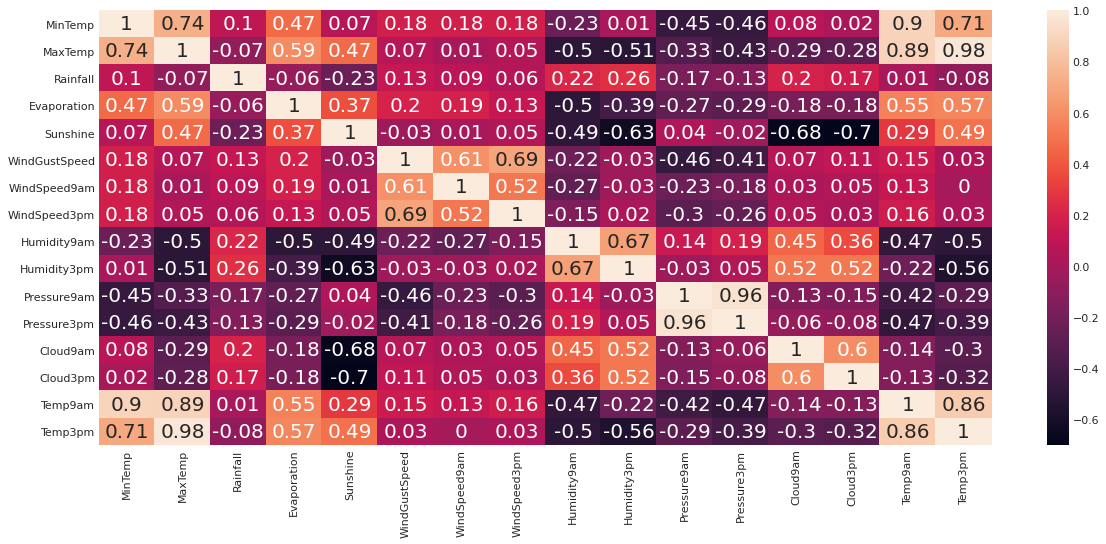

In [367]:
# Matriz de correlación, redondeo a 2 decimales
correlation_matrix = df_weather.corr().round(2)
fig,axes = plt.subplots(1,1,figsize=(20,8))
sns.heatmap(data=correlation_matrix, annot=True,ax=axes);

Observando la matriz de correlación podemos mencionar:

- Las temperaturas máximas y mínimas estan altamente correlacionadas con la temperatura a las 3pm y 9am.
- Las temperaturas a las 9am y 3pm estan correlacionadas
- La velocidad máxima del viento esta levemente correlacionada con la velocidad a las 9am y 3pm.
- Las humedades a las 9am y 3pm estan levemente correlacionadas.
- Las presiones 9am y 3pm estan altamente correlacionadas.
- La cantidad de horas de sol en el día tiene una correlación con la nubosidad a las 9am y 3pm.


## Identificar variables de mayor importancia

Como primer método proponemos aplicar información mutua. En este método se mide el coeficiente de infromación mutua entre las variables de entrada y la variable de salida y se selecciona aquellas variables de entrada con mayor aquellas con mayor dependencia.

In [451]:
df_train=pd.concat([x_train,pd.DataFrame(y_train)],axis=1)

In [452]:
# Codificación date
df_train['Date']=df_train['Date'].astype(str).str[5:7].astype(int)

In [453]:
# Codificación Locacion
aux= df_train[df_train['RainTomorrow']=='Yes'].groupby('Location')['RainTomorrow'].\
                          count() / df_train.groupby('Location')['RainTomorrow'].count()
location_dict= {a: b for a, b in zip(aux.index,aux.values)}
df_train.loc[:, 'Location'] = df_train.loc[:, 'Location'].map(location_dict)

In [454]:
# Codificacion Dirección viento
windir_dict={k:i for i,k in enumerate(df_train['WindGustDir'].unique())}
df_train.loc[:, 'WindGustDir'] = df_train.loc[:, 'WindGustDir'].map(windir_dict)
df_train.loc[:, 'WindDir9am'] = df_train.loc[:, 'WindDir9am'].map(windir_dict)
df_train.loc[:, 'WindDir3pm'] = df_train.loc[:, 'WindDir3pm'].map(windir_dict)

In [455]:
# Codificacion RainToday
raintoday_dict={'No':0,'Yes':1}
df_train.loc[:, 'RainToday'] = df_train.loc[:, 'RainToday'].map(raintoday_dict)

In [456]:
# Delete values where output is Nan
df_train=df_train[df_train['RainTomorrow'].notna()]

In [473]:
# Imputo valores
df_train.loc[df_train['Evaporation'].isna(),'Evaporation'] = -1
df_train.loc[df_train['Sunshine'].isna(),'Sunshine'] = -1
df_train.loc[df_train['Cloud9am'].isna(),'Cloud9am'] = -1
df_train.loc[df_train['Cloud3pm'].isna(),'Cloud3pm'] = -1
df_train.loc[df_train['RainToday'].isna(),'RainToday'] = -1
imputer = SimpleImputer()
df_x_train=imputer.fit_transform(df_train.drop('RainTomorrow',axis=1))

In [497]:
# Codificacion de la salida
df_train.loc[:, 'RainTomorrow'] = df_train.loc[:, 'RainTomorrow'].map(raintoday_dict)


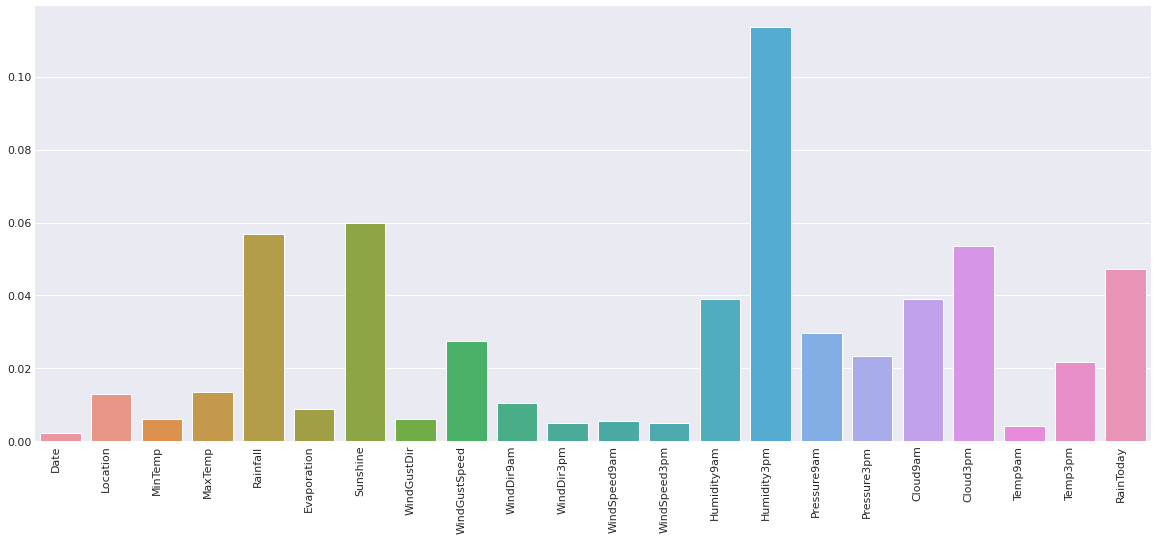

In [498]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

def select_features_mutual_info(X_train, y_train,k= 'all'):  
  fs = SelectKBest(score_func=mutual_info_classif, k=k )  
  fs.fit(X_train, y_train)  
  return fs

fs = select_features_mutual_info(df_x_train, df_train['RainTomorrow'])
fig,axes = plt.subplots(1,1,figsize=(20,8))
bar = sns.barplot( x = [c for c in df_train.drop('RainTomorrow',axis=1).columns], y = fs.scores_,ax=axes)
bar.set_xticklabels(bar.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

Como segundo método proponemos aplicar Lasso. Lasso es un método de regularización de regresión lineal cuya característica es que tiende a cero la componente de multiplicación de aquellos parámetros que no son importantes en la relación lineal

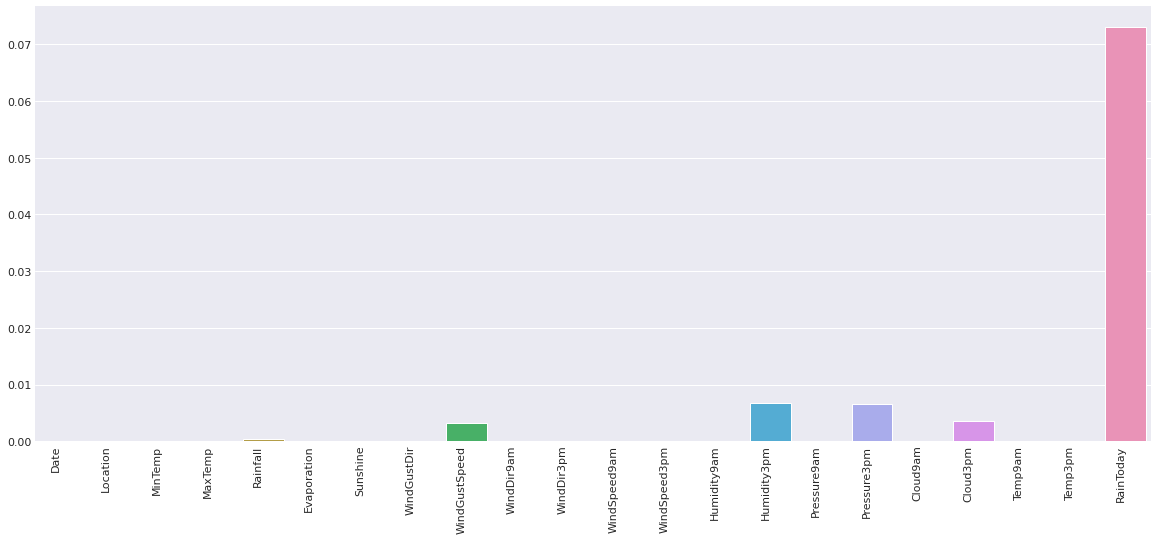

In [518]:
lassoreg = Lasso(alpha=0.0001,normalize=True, max_iter=1000)
lassoreg.fit(df_x_train, df_train['RainTomorrow'])
fig,axes = plt.subplots(1,1,figsize=(20,8))
bar = sns.barplot( x = [c for c in df_train.drop('RainTomorrow',axis=1).columns], \
                  y = np.abs(lassoreg.coef_), ax=axes)
bar.set_xticklabels(bar.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()
